# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

2. Load the `customer_value_analysis.csv` into the variable `customer_df`.

In [2]:
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')

3. First look at its main features (`head`, `shape`, `info`).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).

In [6]:
customer_df.columns = [col.replace(" ","_").lower() for col in customer_df.columns]

In [7]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change the type of `effective_to_date` column to DateTime format.

In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_3515/791879803.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


6. Check `NaN` values per column.

In [9]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [10]:
def split_df (df: pd.DataFrame) ->  pd.DataFrame:
    '''Function that given an input dataframe, returns two dataframes: 
    one with numerical columns and another with categorical columns of the input dataframe.'''
    df_num = df.select_dtypes(include= np.number)
    df_cat = df.select_dtypes(exclude= np.number)
    return df_num, df_cat

In [11]:
df_num, df_cat = split_df(customer_df)

In [12]:
df_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


8. Drop any ID column.

In [13]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [14]:
df_cat.drop(columns='customer', inplace=True)

9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why? 

In [15]:
df_num.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


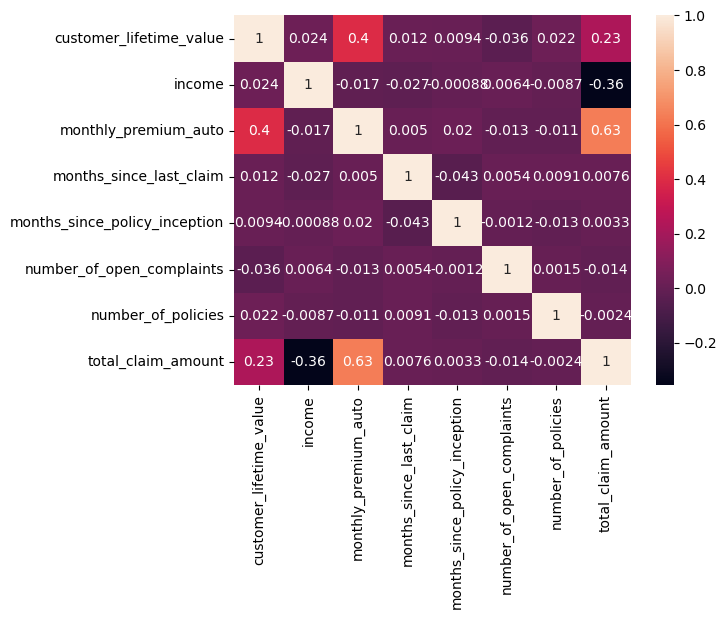

In [16]:
sns.heatmap(df_num.corr(), annot=True)
plt.show()

The highest correlation is between `total_claim_amount`and `monthly_premium_auto` with 0.63.

10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function **must have an optional argument set by default to 36** to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

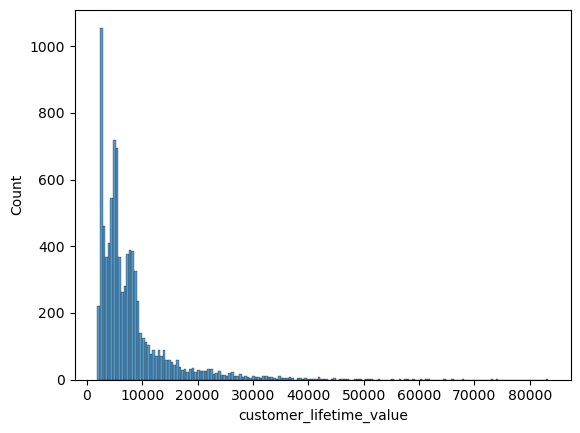

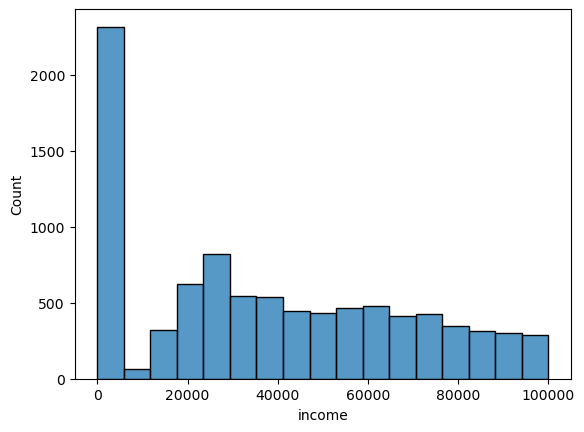

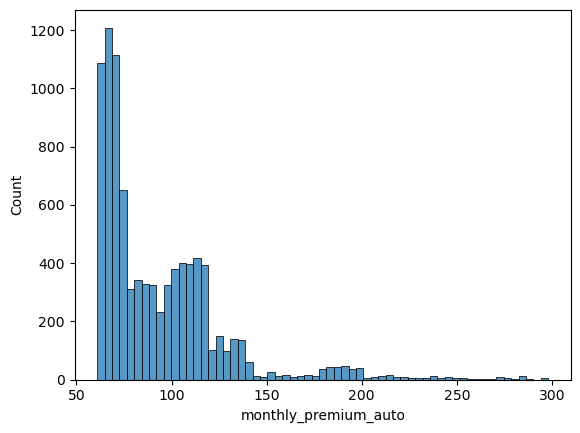

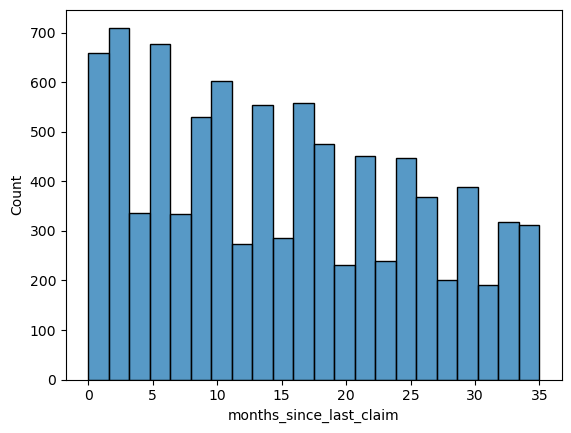

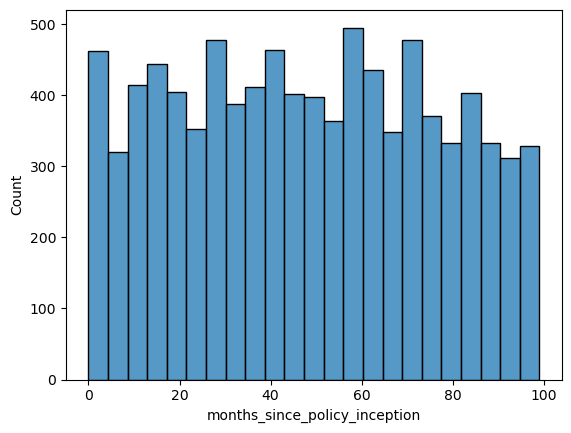

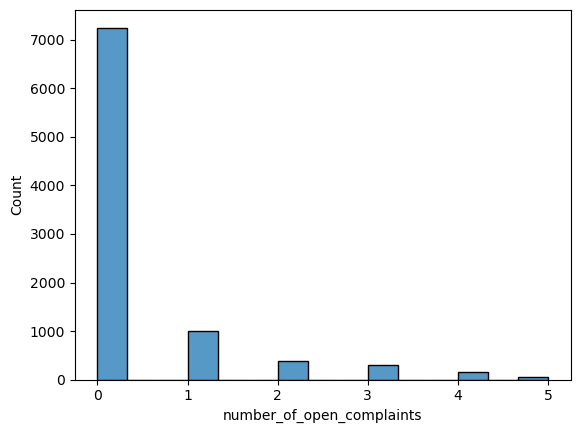

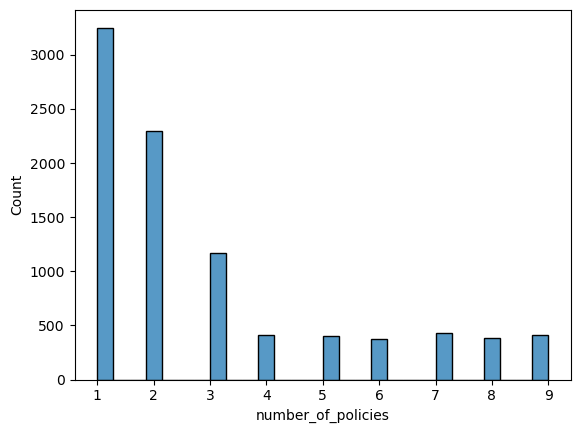

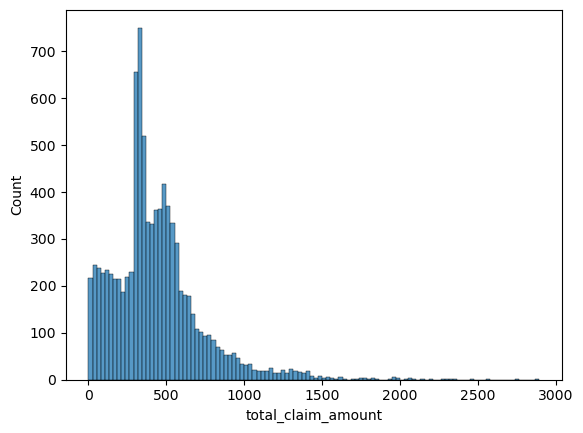

In [17]:
for col in list(df_num.nunique().index):
    sns.histplot(df_num[col])
    plt.show()

In [18]:
df_num.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

It seems like `customer_lifetime_value`, `income`, `monthly_premium_auto`, `months_since_policy_inception`, and `total_claim_amount` are certainly continuous columns. The treshold to distinguish between discrete and continuous will hence be 36 (amount of `months_since_last_claim`)

In [19]:
list(df_num.nunique().index)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [20]:
def split_num_df (df: pd.DataFrame, treshold: 36) ->  pd.DataFrame:
    '''Function that takes a pandas DataFrame and a threshold as an input and returns two pandas DataFrames: 
    the first containing numerical continuous columns and the second containing numerical 
    discrete columns of the input dataframe.'''

    continuous_df_cols = []
    discrete_df_cols = []
    for col in list(df.nunique().index):
        if df[col].nunique() > treshold:
            continuous_df_cols.append(col)
        else:
            discrete_df_cols.append(col)
    
    df_num_contin = df[continuous_df_cols]
    df_num_discr  = df[discrete_df_cols]
            
    return df_num_contin, df_num_discr
    

In [21]:
df_num_contin, df_num_discr = split_num_df(df_num, 36)

In [22]:
df_num_contin.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16). 
12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [23]:
def create_barplot (df: pd.DataFrame) ->  pd.DataFrame:
    '''Function to create a barplot for all the columns of the discrete_df'''

    for col in df.columns:
        plt.figure(figsize=(16, 16))
        sns.countplot(data=df, x=col, color='lightblue')
        plt.title(f'Bar plot for {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.show()

In [24]:
def create_histplot (df: pd.DataFrame) ->  pd.DataFrame:
    '''Function to create a histogram for all the columns of the continuous_df'''

    for col in df.columns:
        plt.figure(figsize=(16, 16))
        sns.histplot(data=df, x=col)
        plt.title(f'Histplot for {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.show()

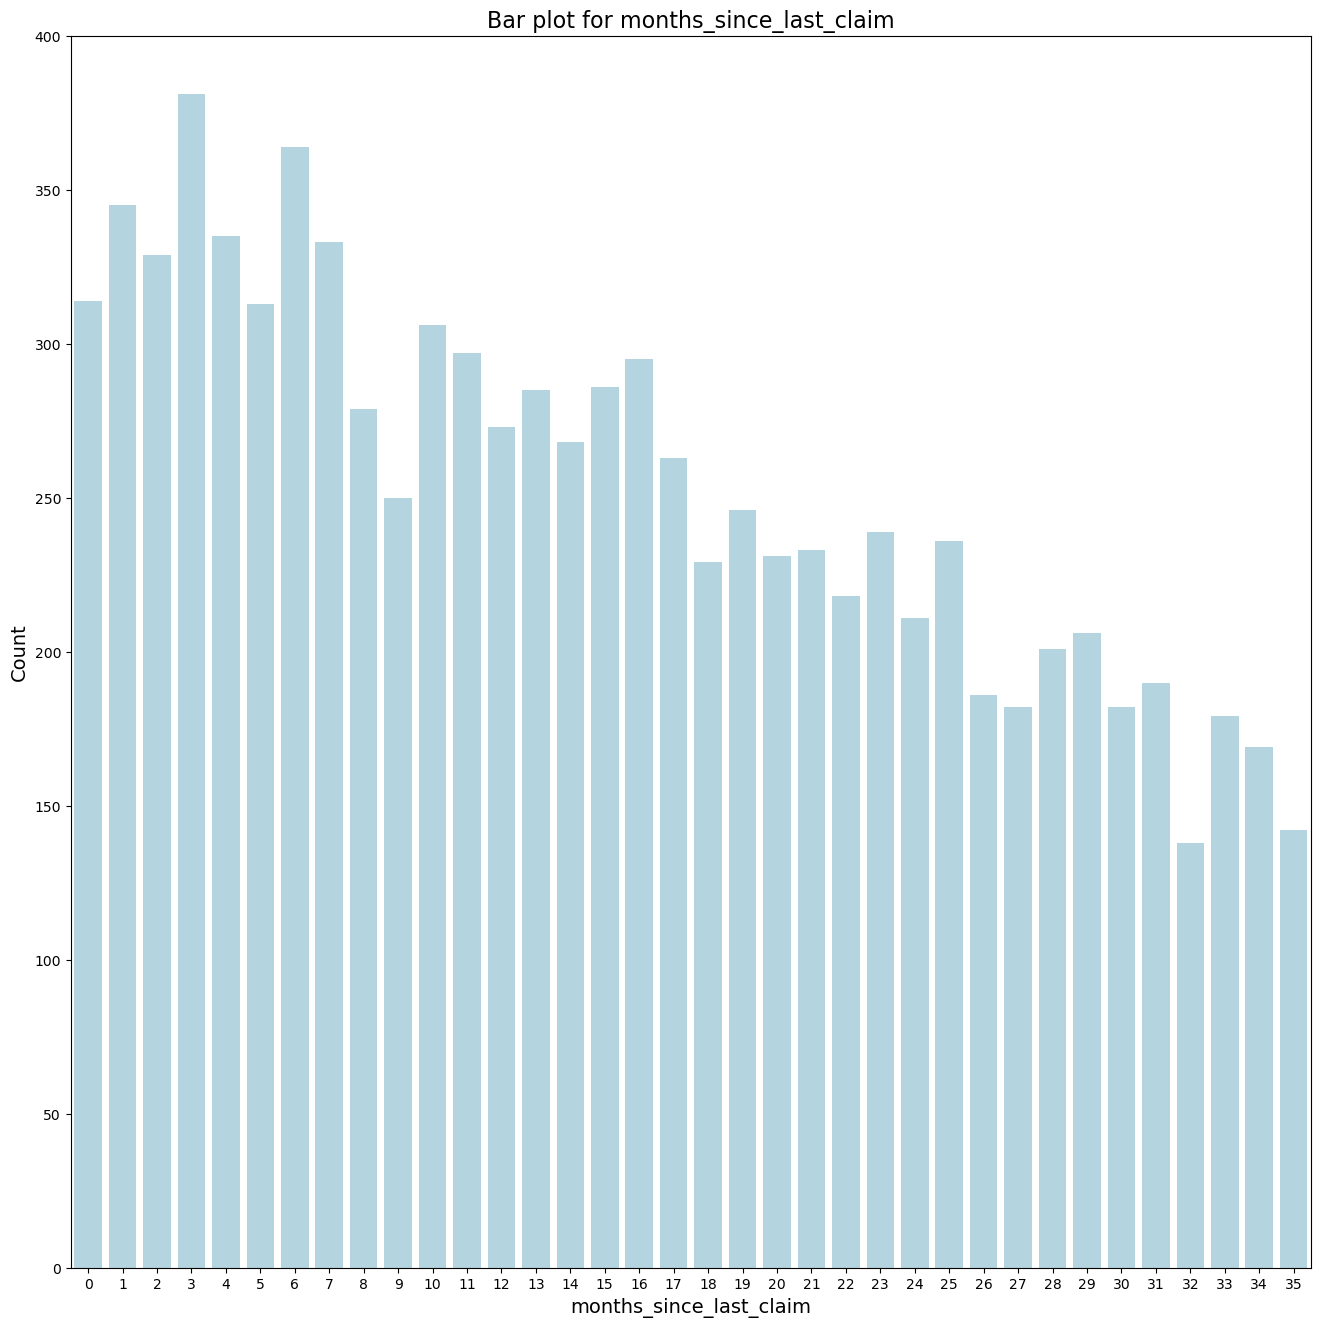

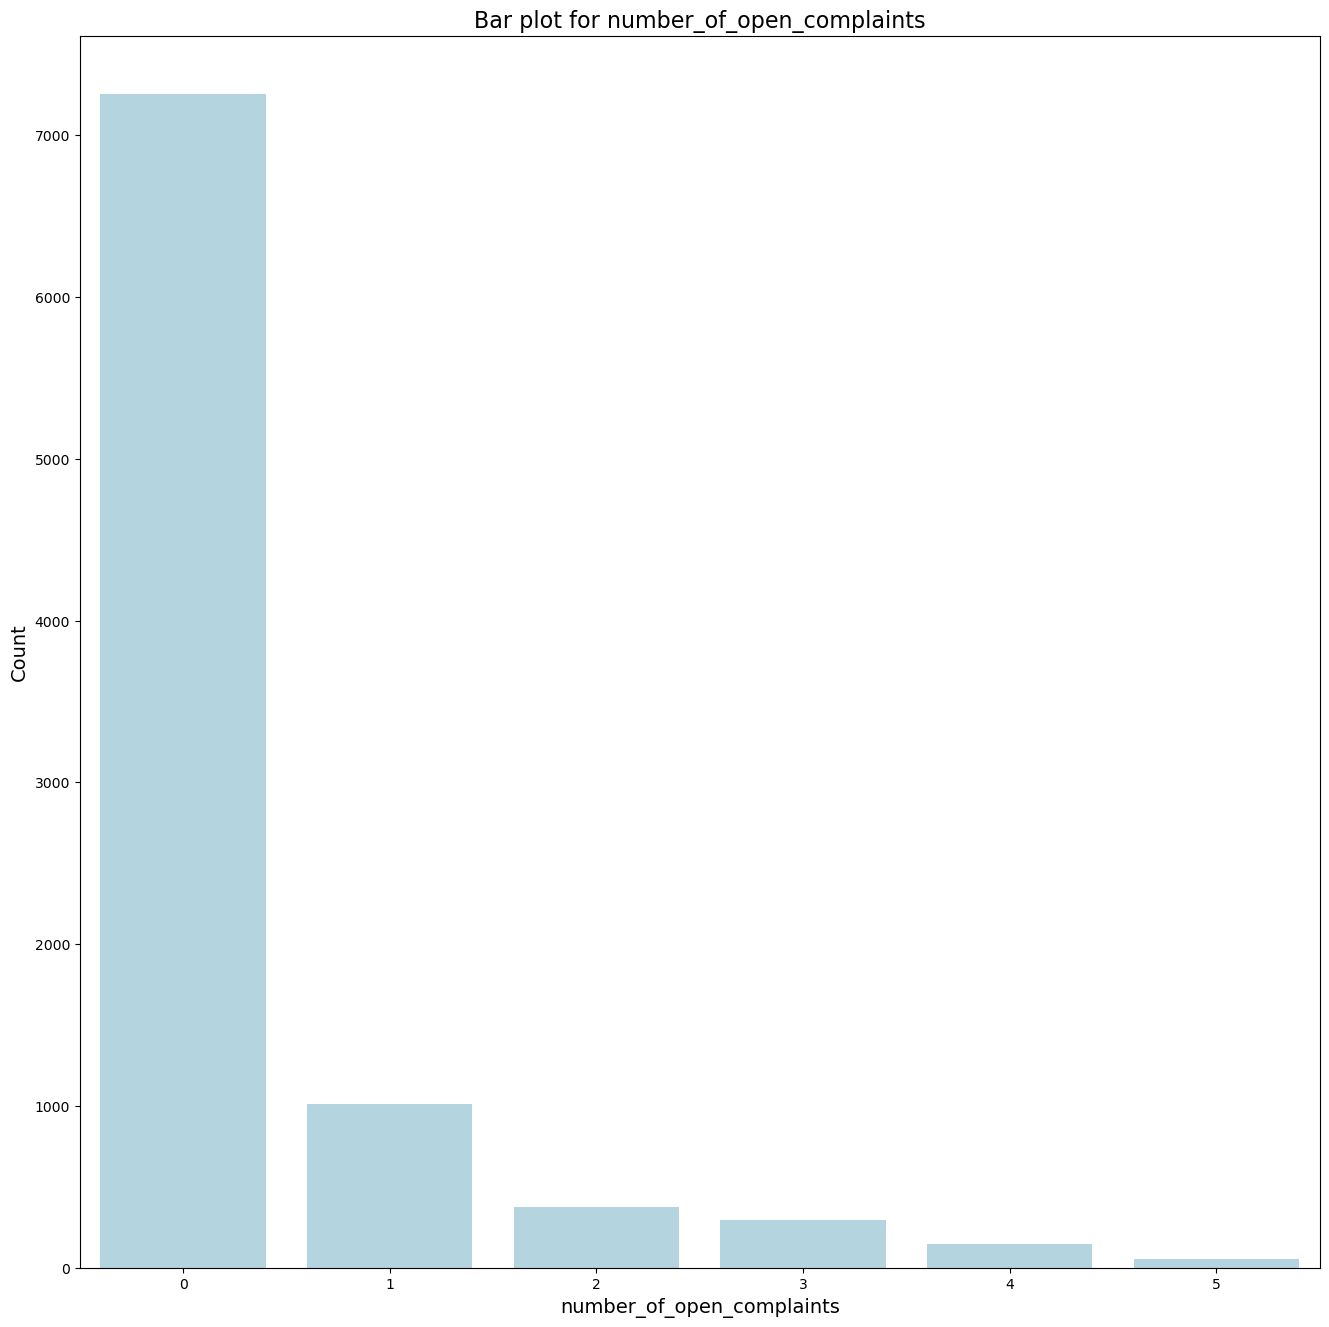

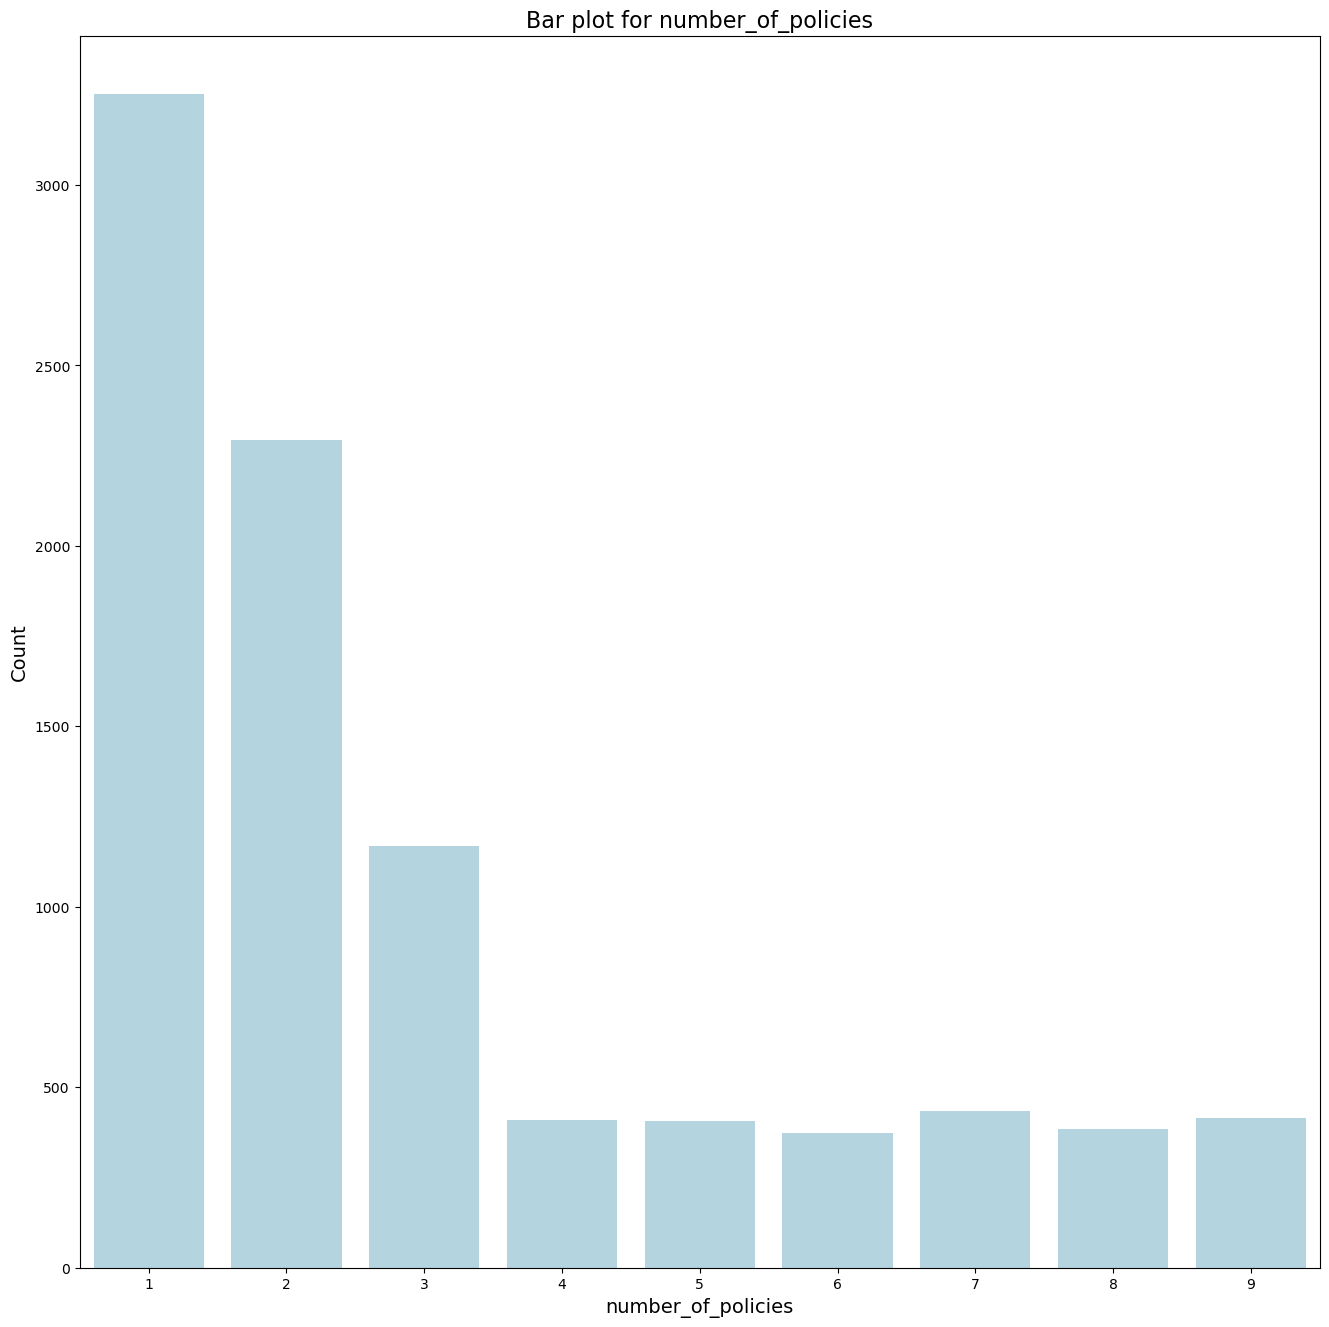

In [25]:
create_barplot(df_num_discr)

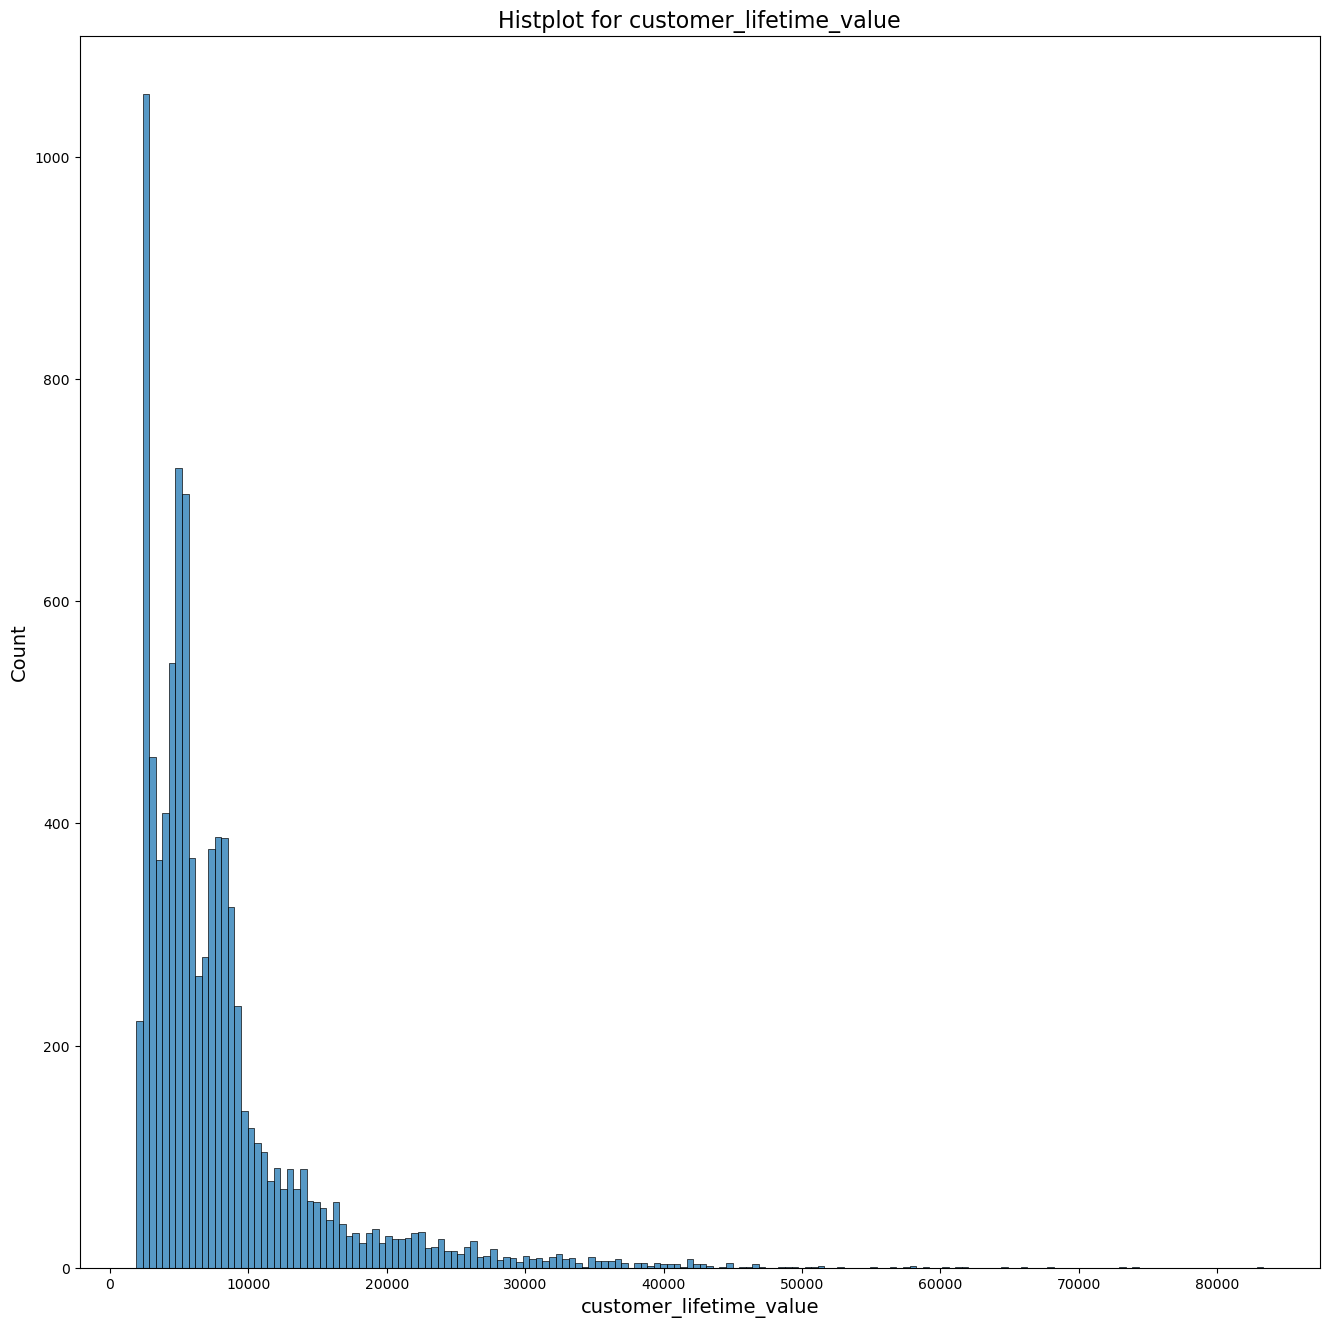

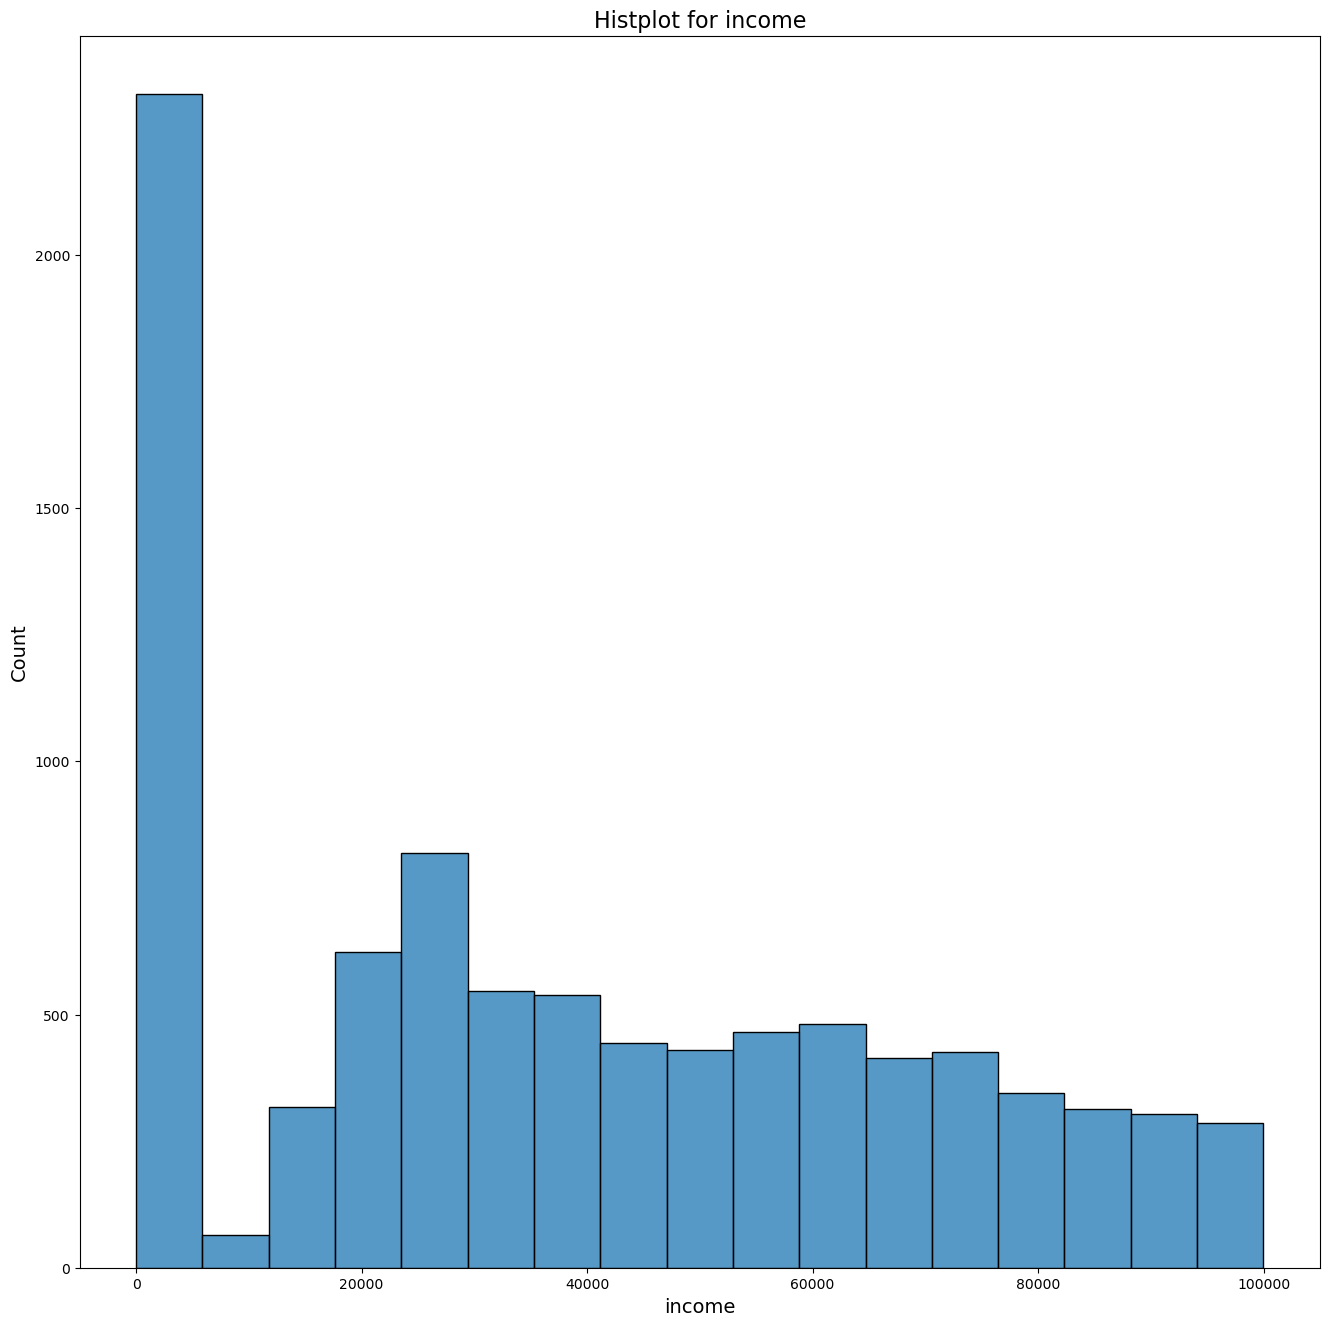

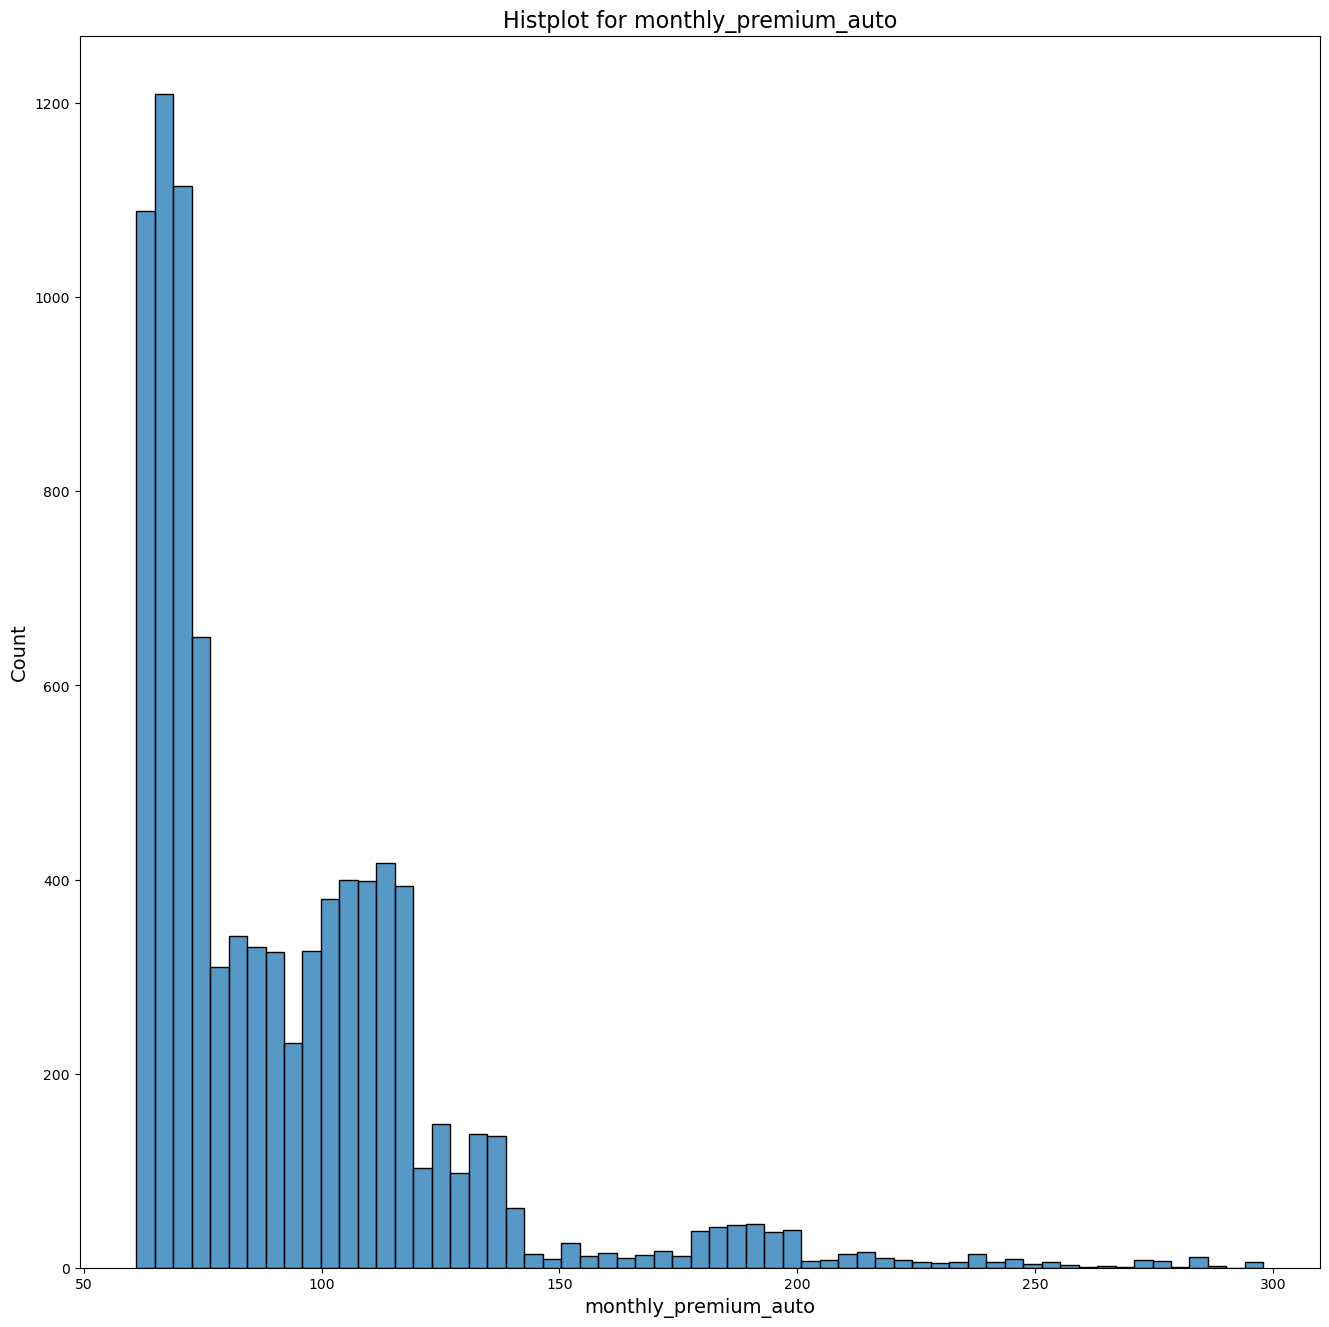

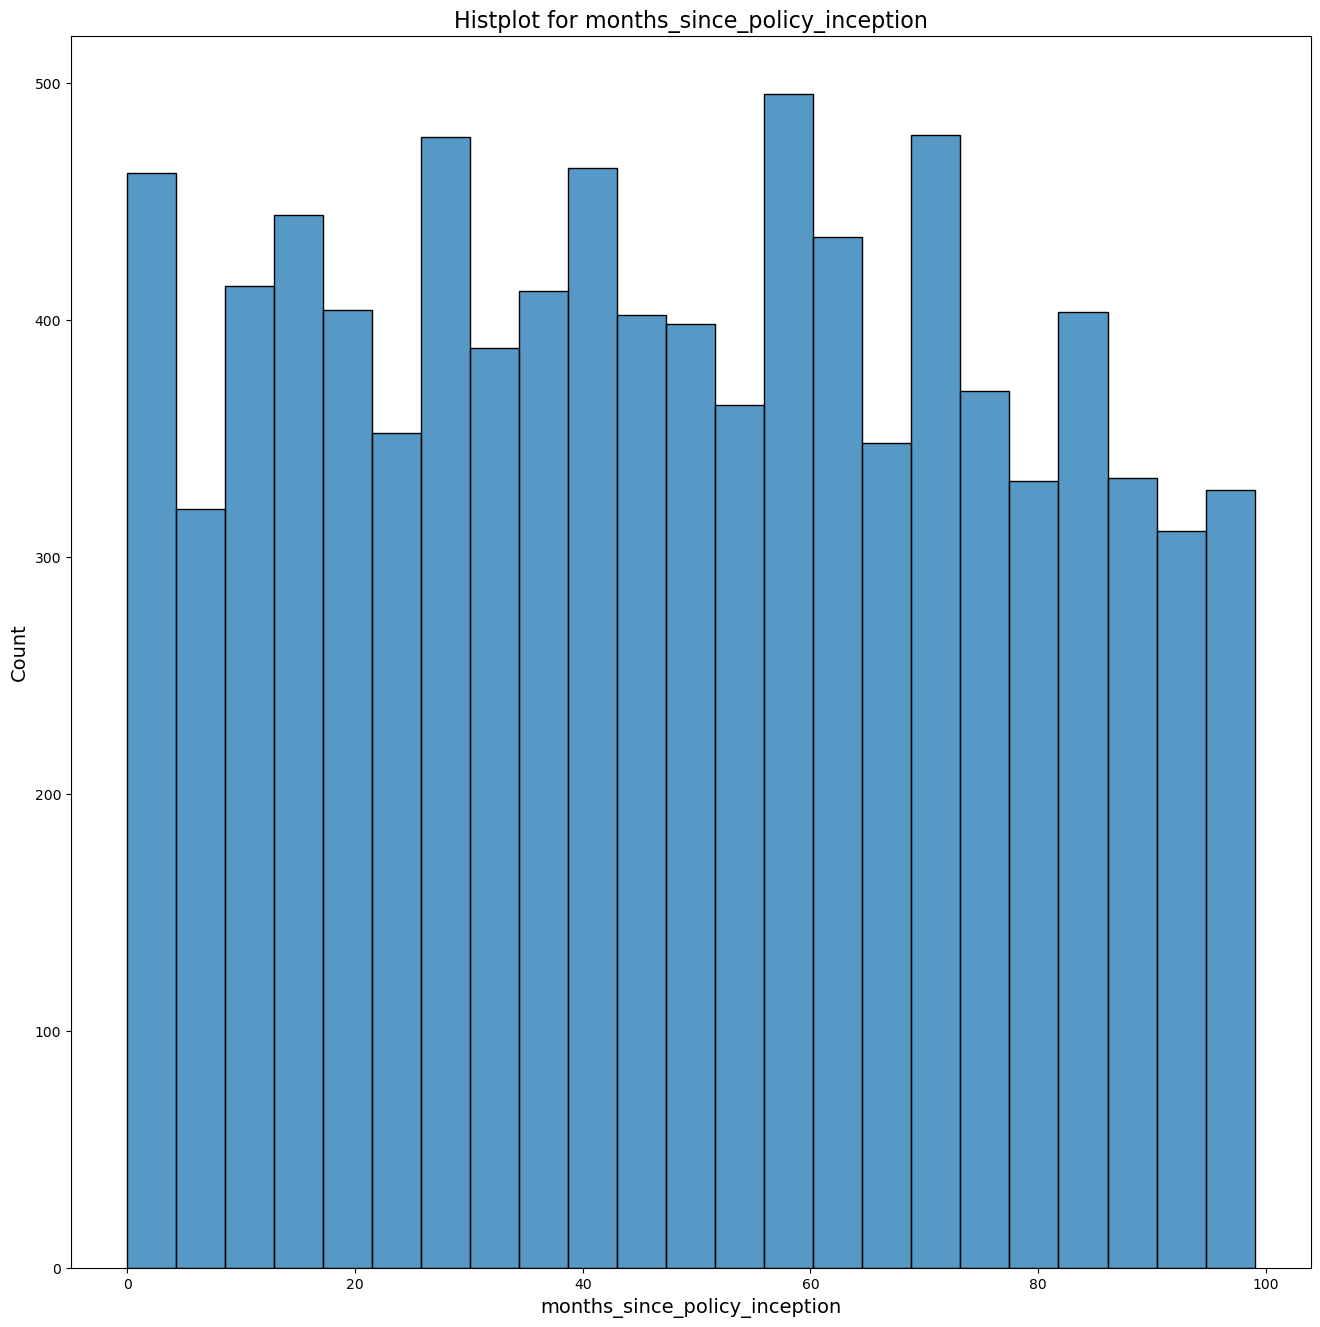

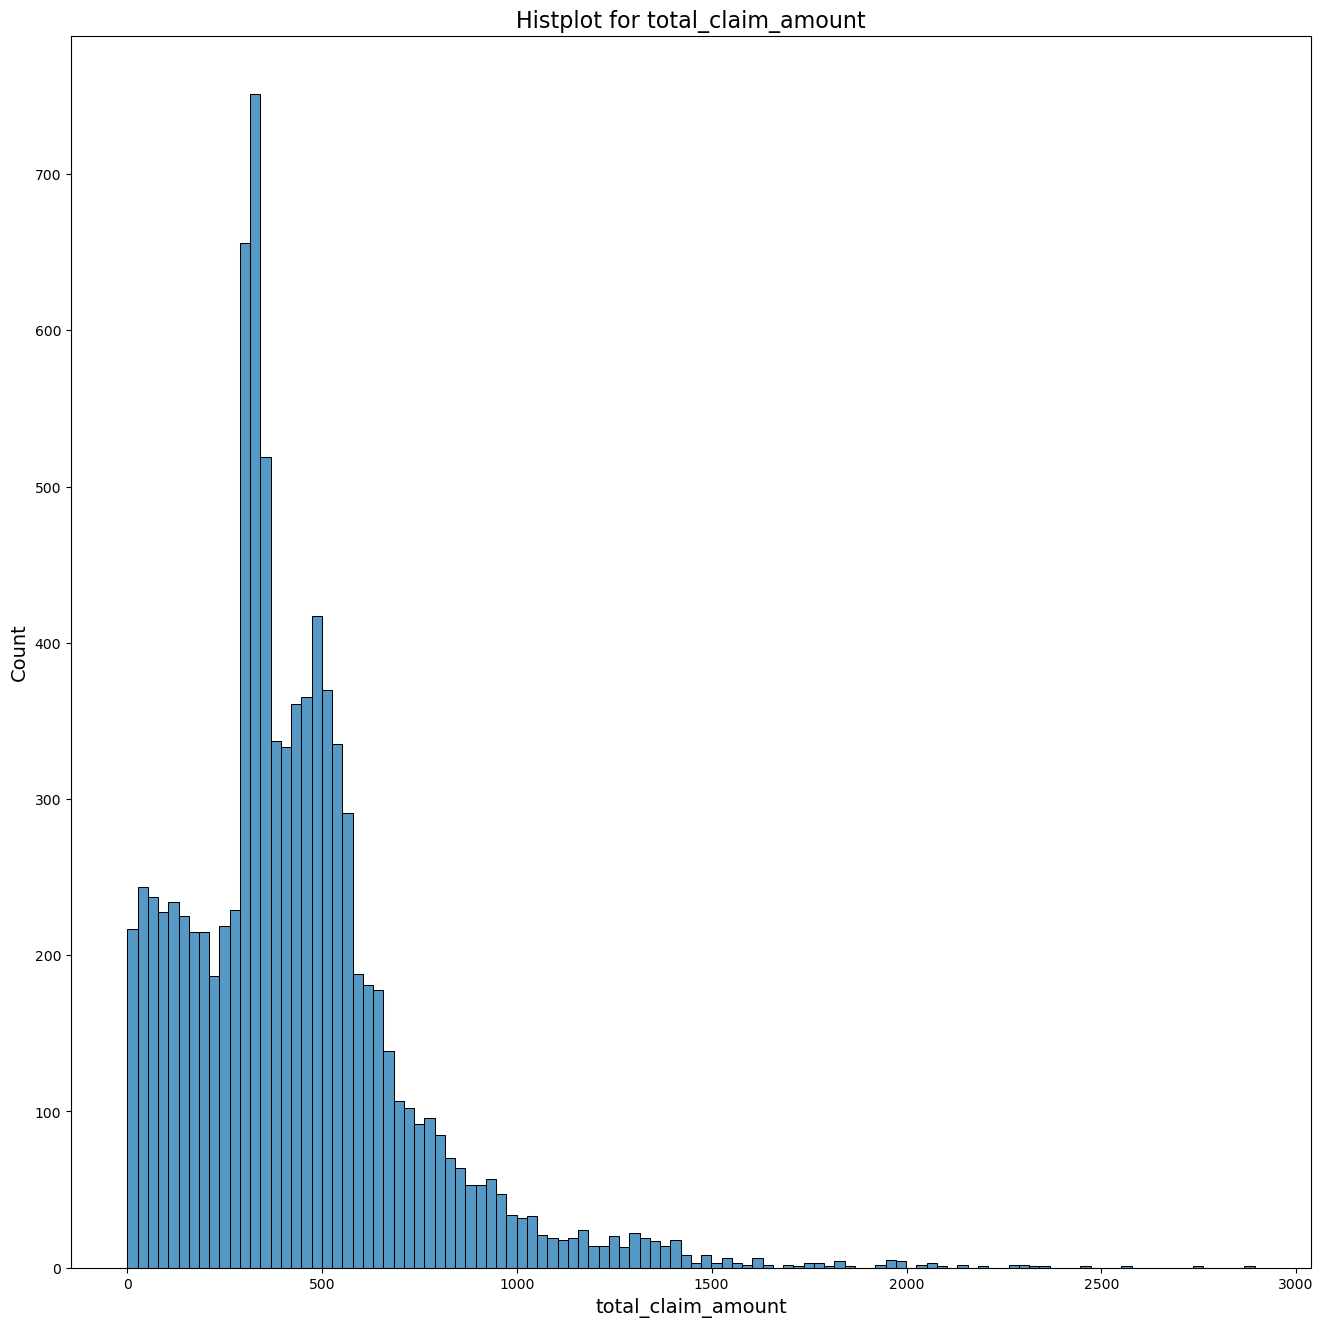

In [26]:
create_histplot(df_num_contin)

13. According to the previous histogram plots, do you think that you will have to apply any transformation?

Yes! The continuous variables are of different ranges and some of the seem to have a skew.

In [27]:
df_num_contin.skew()

customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_policy_inception    0.040165
total_claim_amount               1.714966
dtype: float64

In [28]:
# transform the columns:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')

num_contin_transformed = transformer.fit_transform(df_num_contin)
df_num_contin_transformed = pd.DataFrame(num_contin_transformed, columns=df_num_contin.columns)

In [29]:
df_num_contin_transformed.skew()

customer_lifetime_value          0.043527
income                          -0.856134
monthly_premium_auto             0.175680
months_since_policy_inception   -0.251611
total_claim_amount               0.046702
dtype: float64

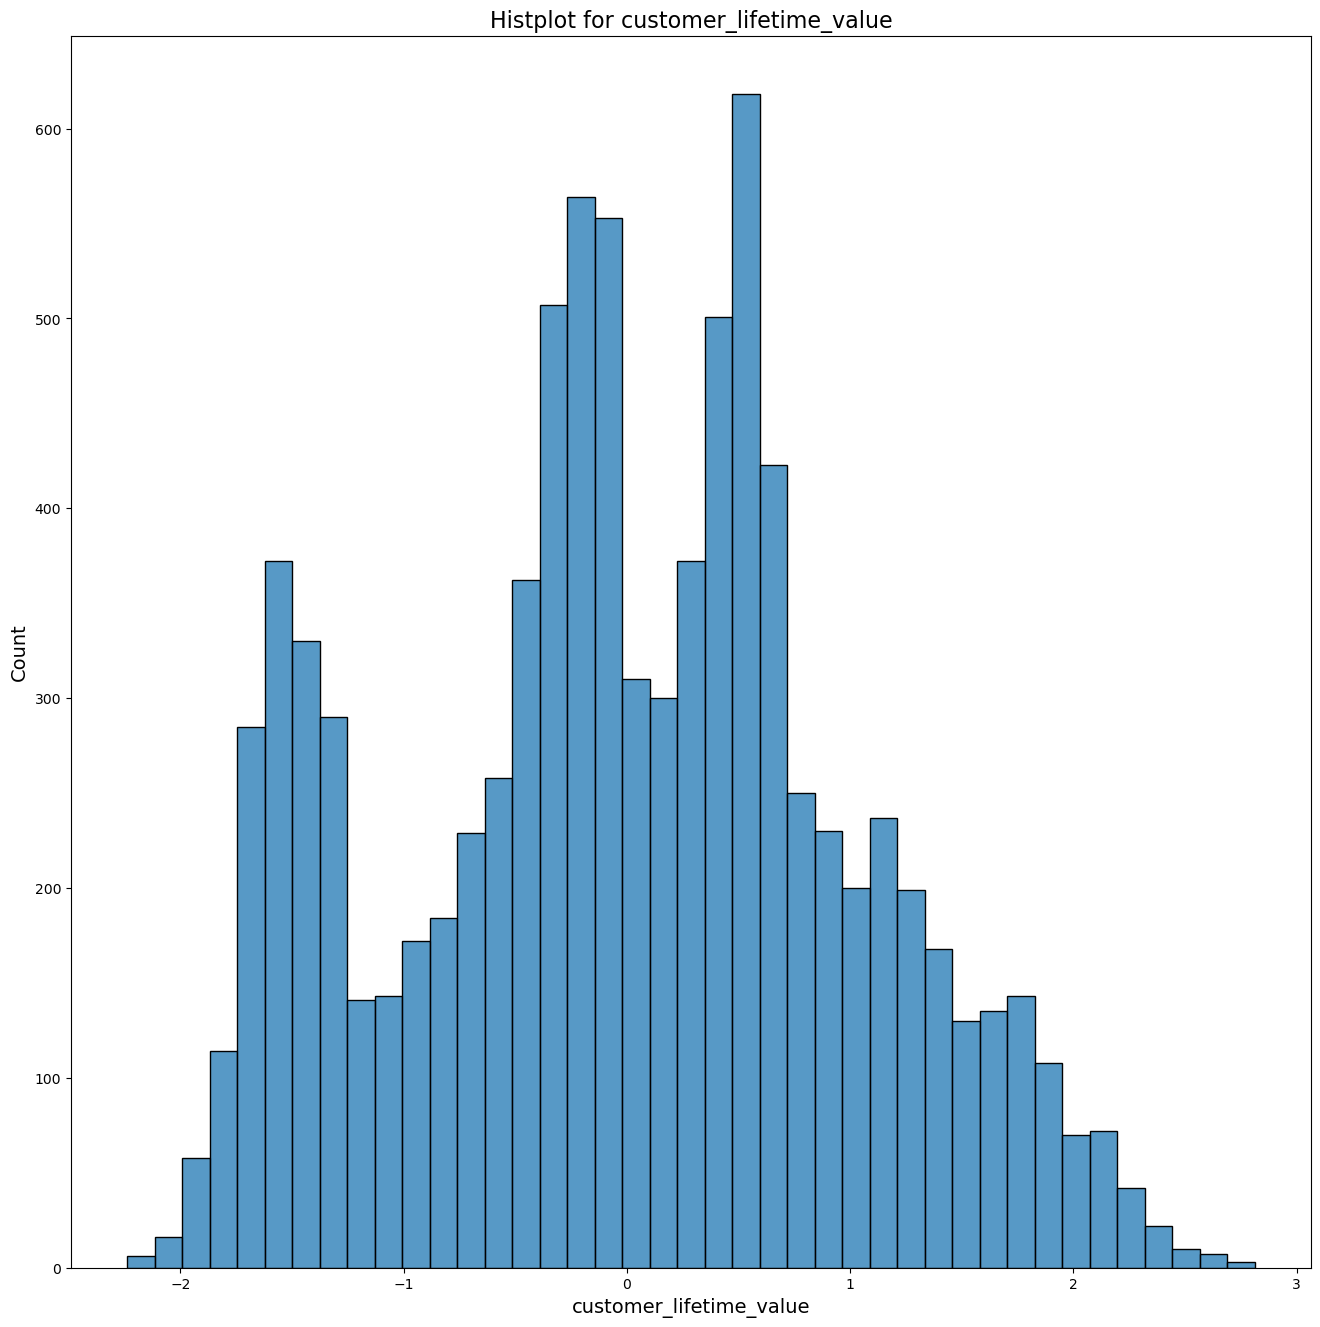

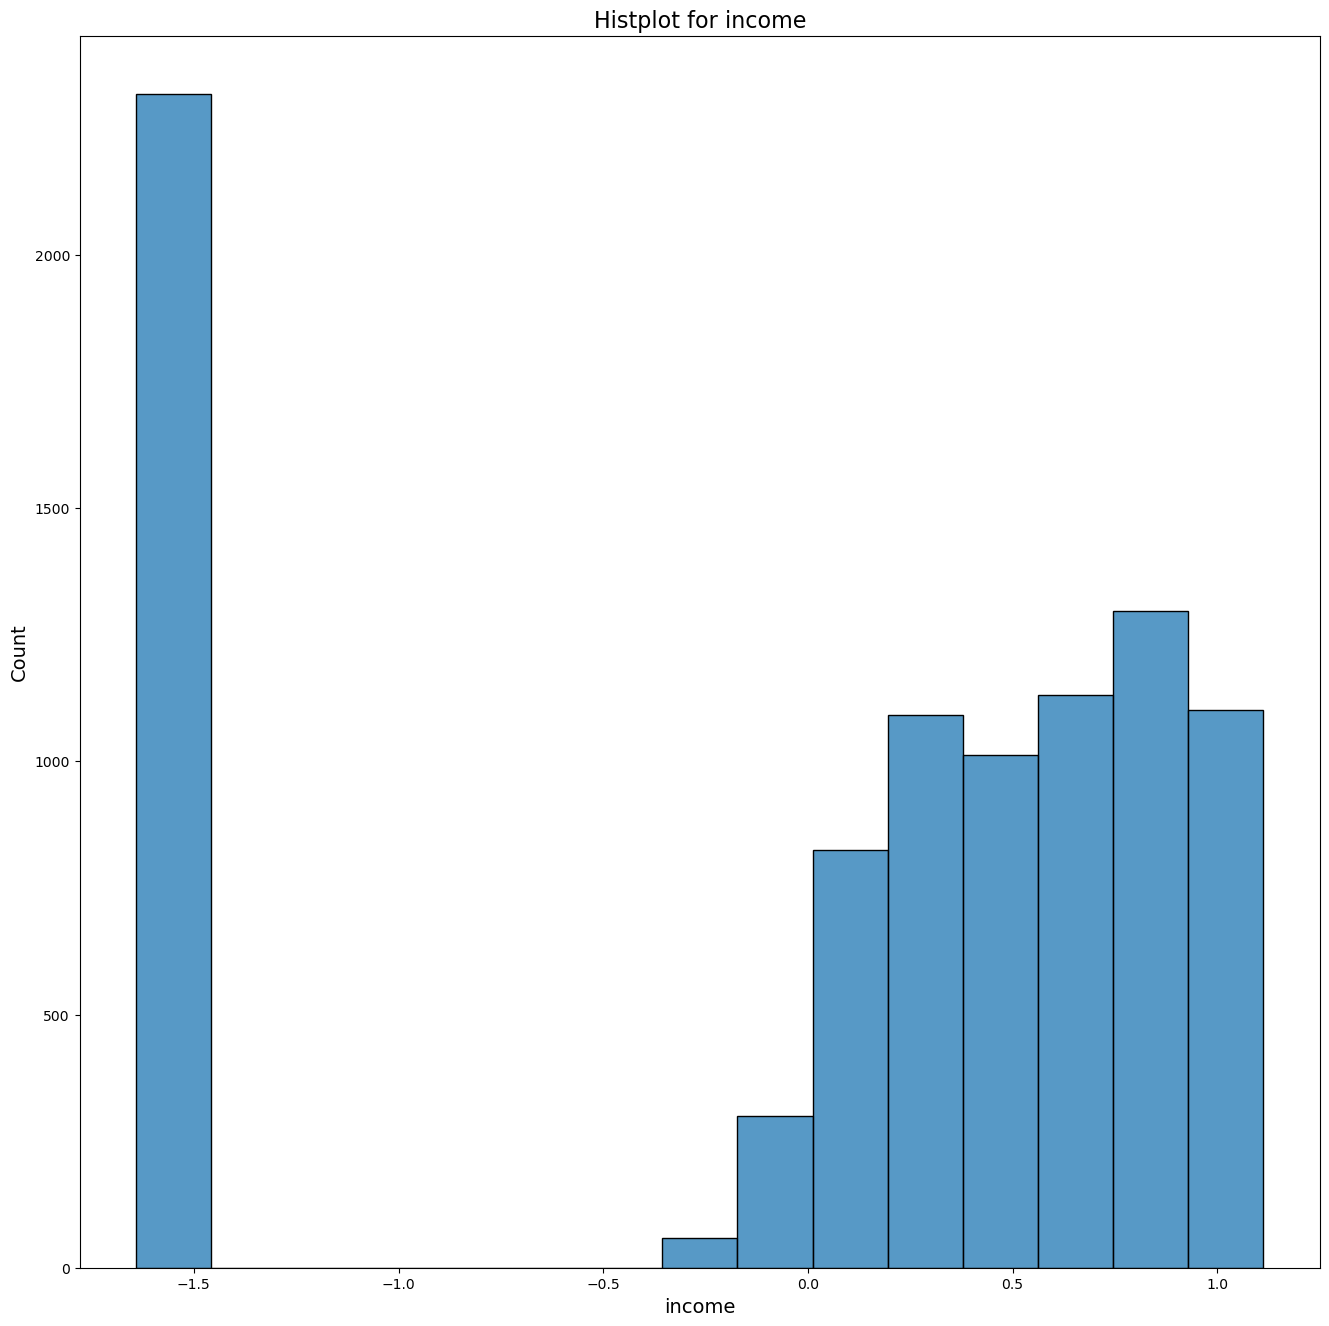

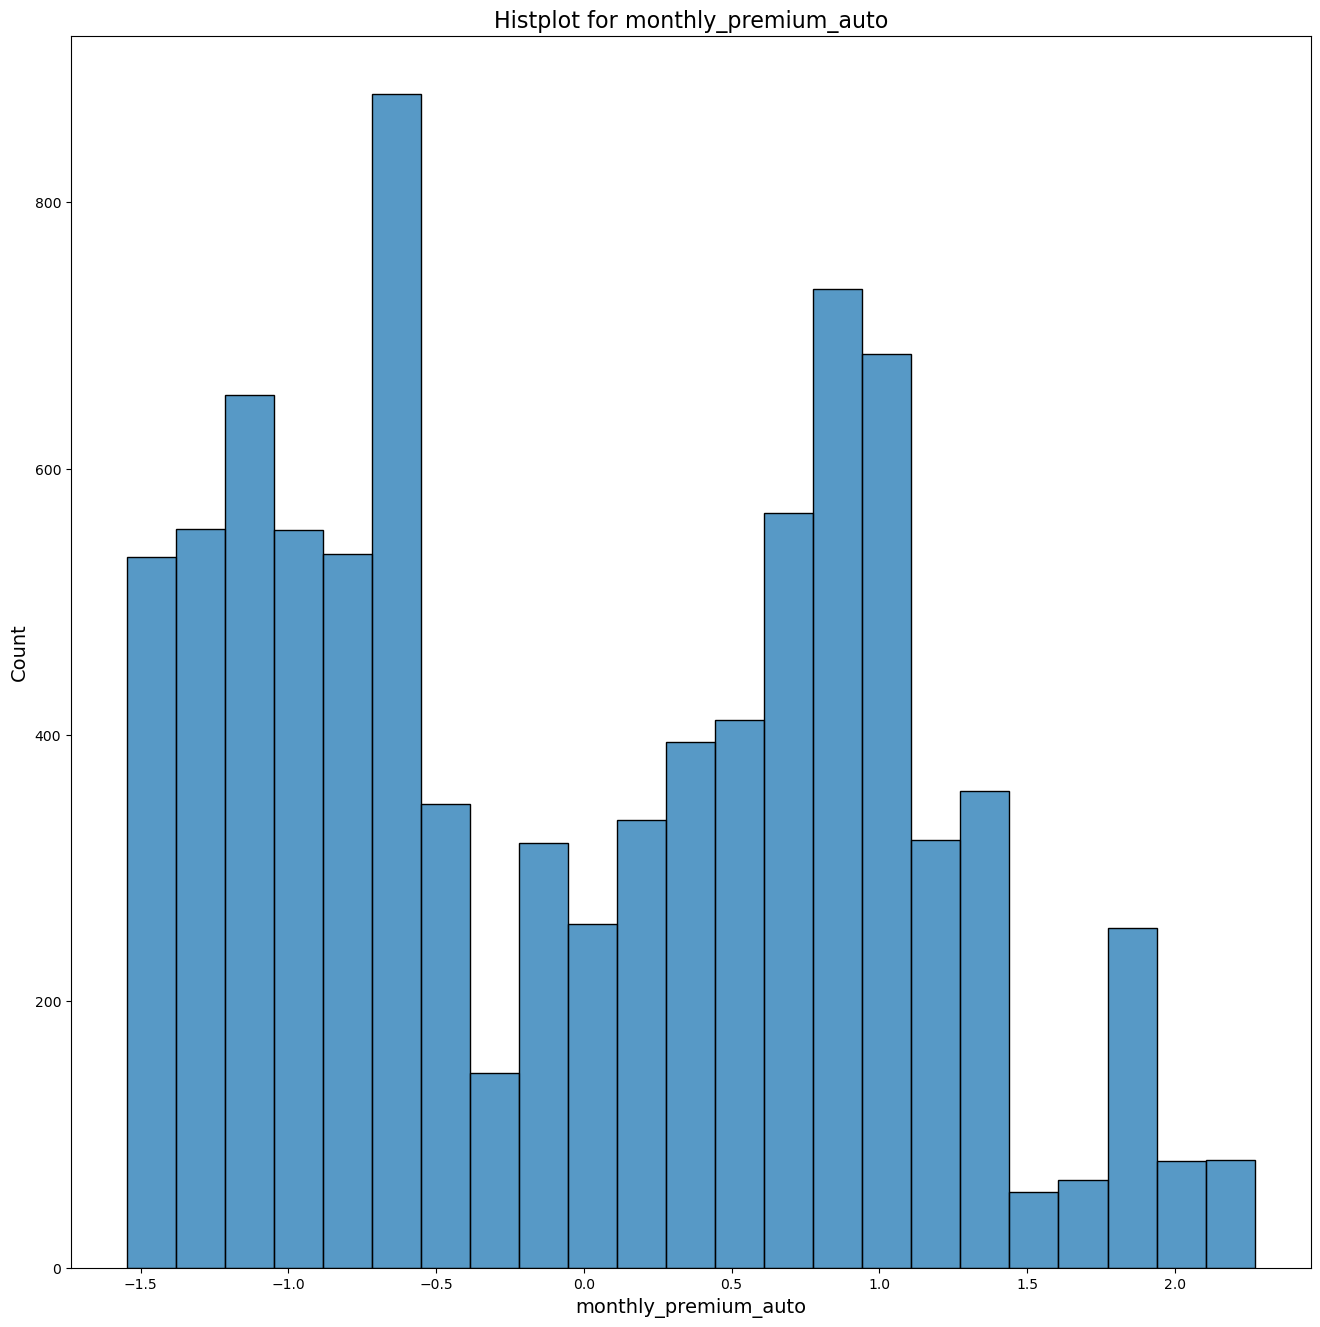

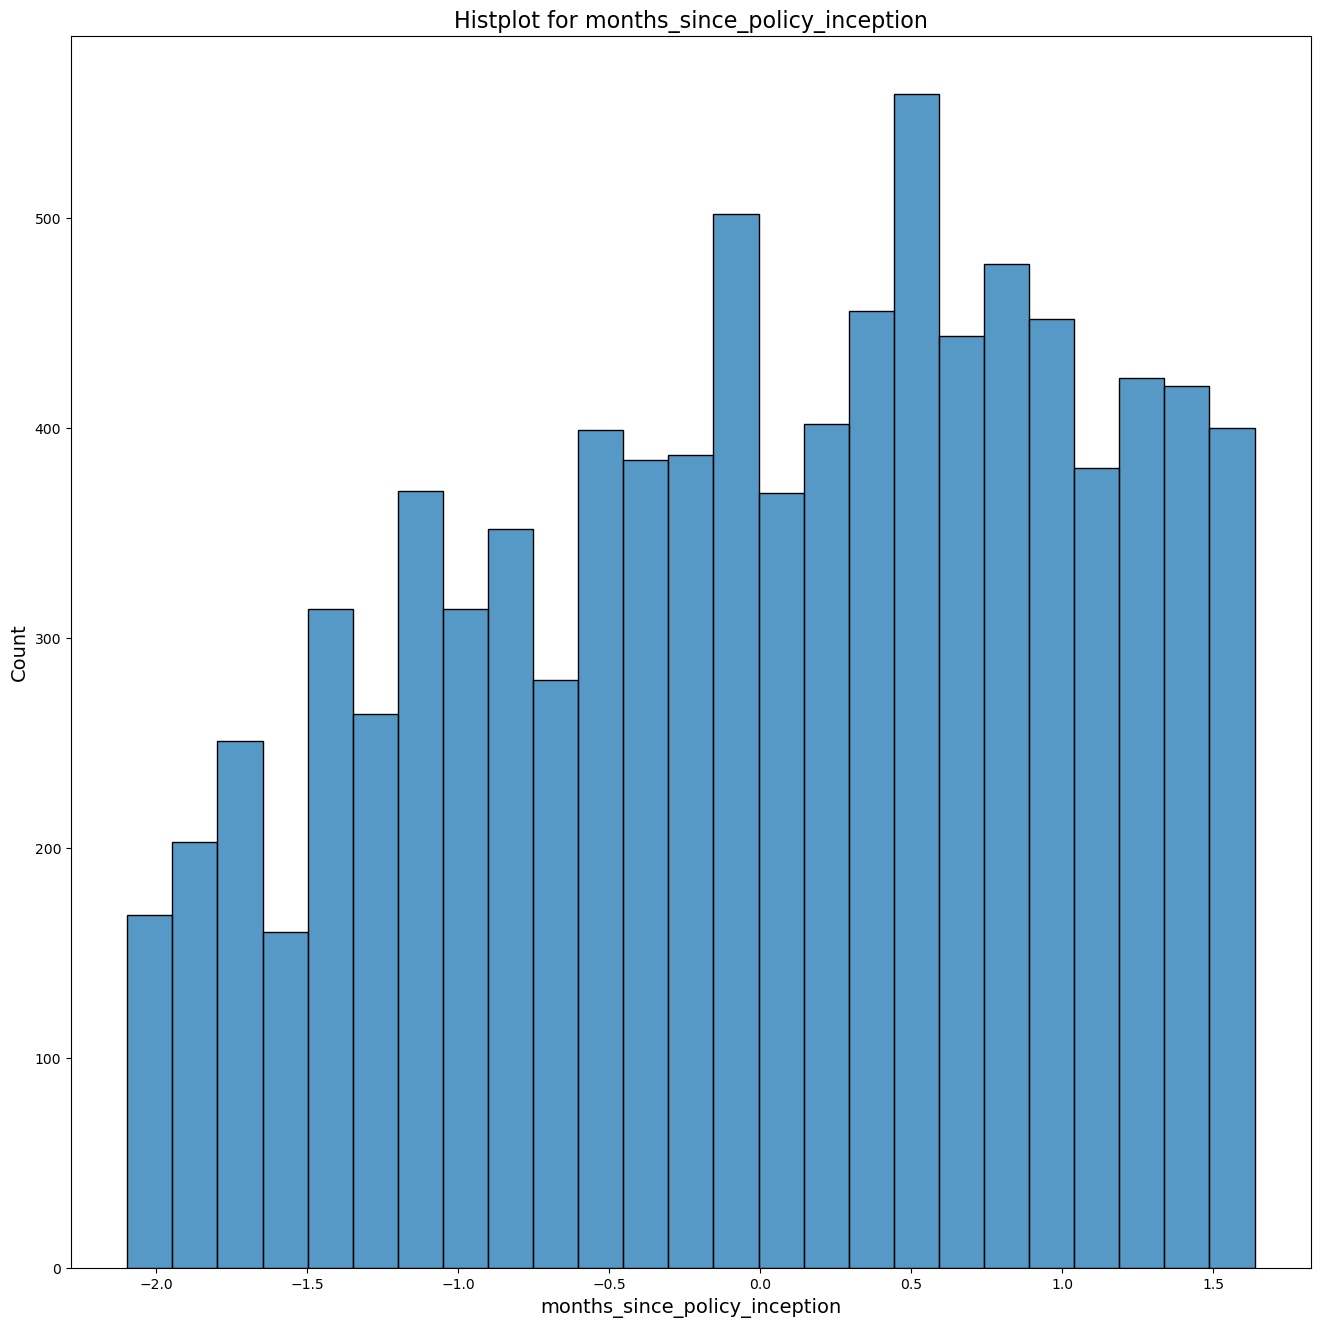

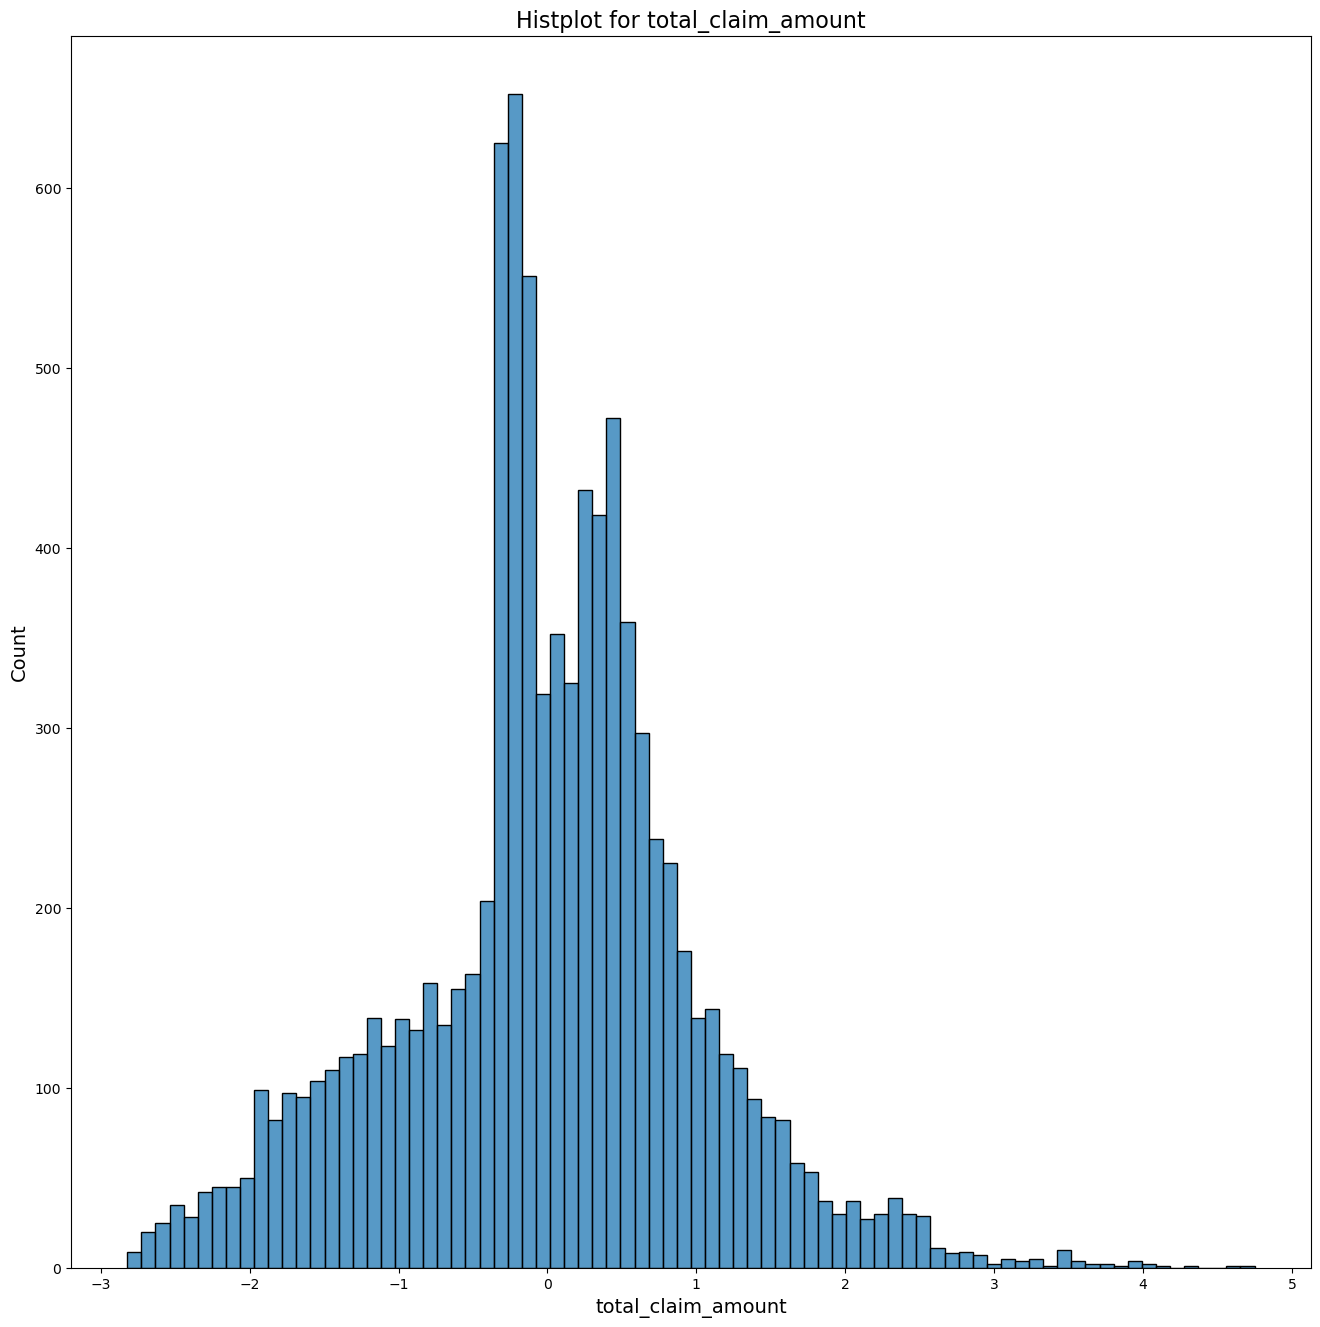

In [30]:
create_histplot(df_num_contin_transformed)

14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [31]:
def create_boxplot (df: pd.DataFrame) ->  pd.DataFrame:
    '''Function to create a histogram for all the columns of the continuous_df'''

    for col in df.columns:
        plt.figure(figsize=(8, 2))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot for {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.show()

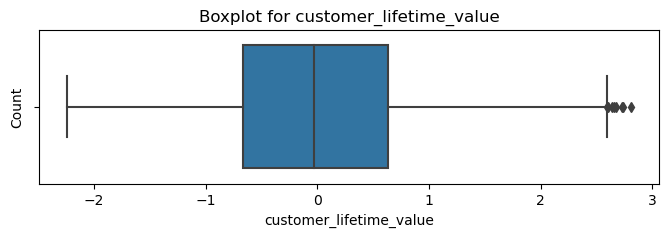

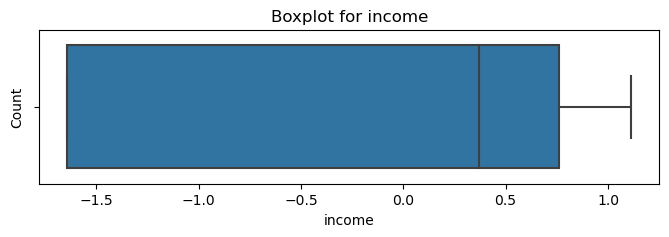

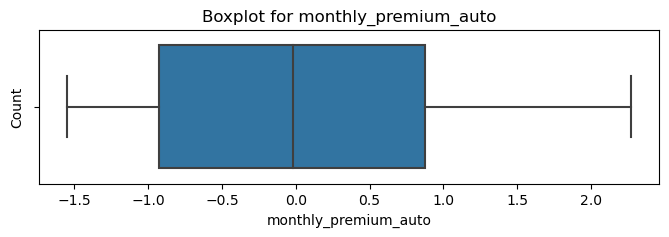

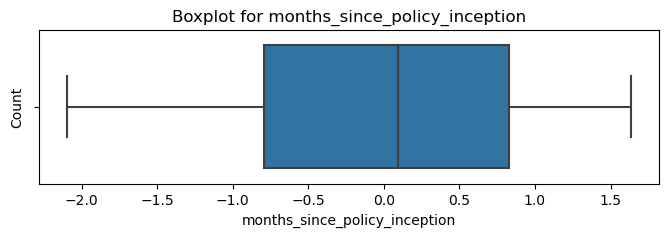

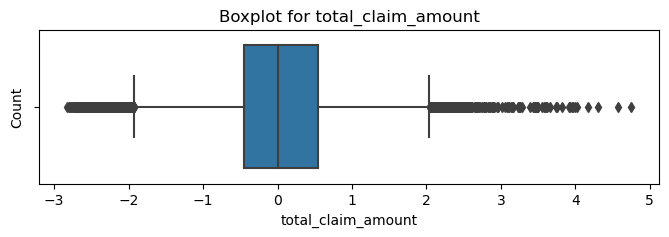

In [32]:
create_boxplot(df_num_contin_transformed)

`total_claim_amount` still has a few outliers that should be deleted.

Given the distribution (cf. histogram) I would only drop the values > 4.

However, I will also apply the Z-score (outlier if abs(z-score) > 3) to evaluate the impact.

In [33]:
df_num_contin_transformed[['total_claim_amount']].describe()

,total_claim_amount
count,9.134000e+03
mean,-7.234560e-17
std,1.000055e+00
min,-2.821922e+00
25%,-4.444204e-01
50%,3.195423e-03
75%,5.477369e-01
max,4.749093e+00


In [34]:
df_num_contin_transformed['abs-z-score'] = np.abs(
    (df_num_contin_transformed[['total_claim_amount']] - df_num_contin_transformed[['total_claim_amount']].mean() ) 
       / df_num_contin_transformed[['total_claim_amount']].std(ddof=1) )
outliers = df_num_contin_transformed[ df_num_contin_transformed['abs-z-score'] > 3 ].index.tolist()

In [35]:
len(outliers)

45

In [36]:
df_num_contin_transformed.shape

(9134, 6)

In [37]:
df_num_contin_transformed_removed_outliers = df_num_contin_transformed.drop(labels=outliers)

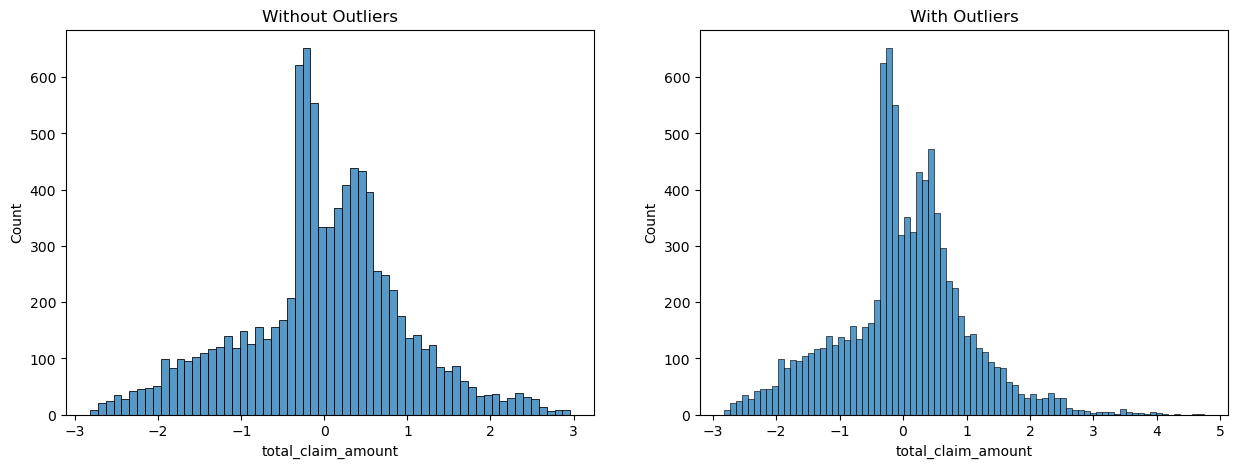

In [38]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df_num_contin_transformed_removed_outliers, x='total_claim_amount',ax=ax[0]).set_title('Without Outliers')
sns.histplot(data=df_num_contin_transformed, x='total_claim_amount',ax=ax[1]).set_title('With Outliers')
plt.show()

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case of the previous lab. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data. 

### Special instructions

As in this lab, we will keep working on the same dataset as the previous lab, please make a copy of the final Jupyter notebook of the previous lab in the current lab folder. Next, use Markdown to add a new section in the Jupyter notebook named `Lab Cleaning Categorical Data`. Then restart the Kernel and run all the previous cells. Finally, keep working on the same notebook according to the next instructions.

### Instructions

1. Define a function that given a pandas DataFrame as input creates a **seaborn countplot** of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [39]:
df_cat.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [40]:
def create_countplot(df: pd.DataFrame):
    '''
    Creates countplots for each columns of the given dataframe.
    If unique values of the column is >=6 it puts the bars on the y-axis instead of the x-axis.
    '''
    for col in df.columns:
        if len(df[col].unique())<6:
            fig, ax = plt.subplots(figsize=(10,5))
            sns.countplot(df, x=df[col], order=df[col].value_counts().index)
        else:
            fig, ax = plt.subplots(figsize=(10,5))
            sns.countplot(df, y=df[col], order=df[col].value_counts().index)
    return plt.show()

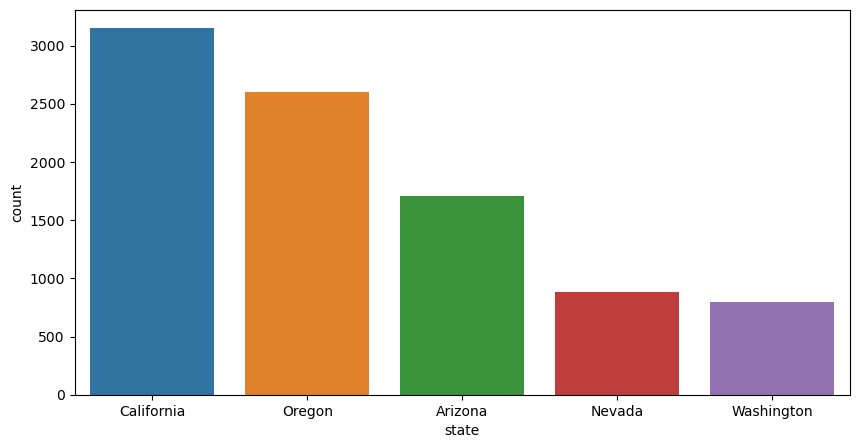

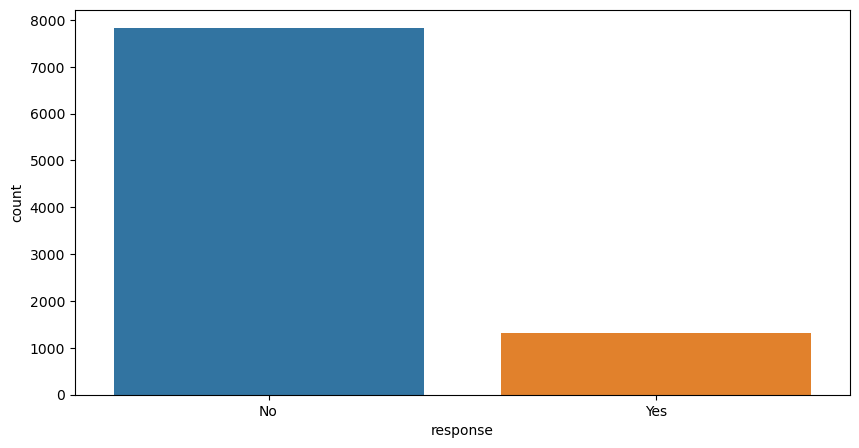

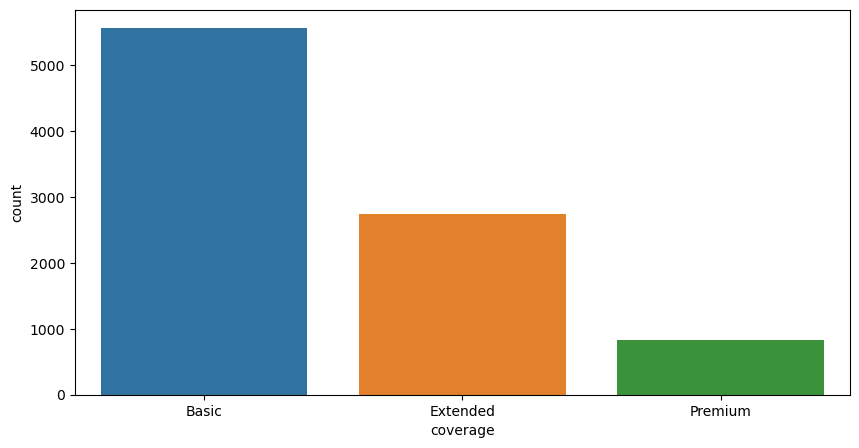

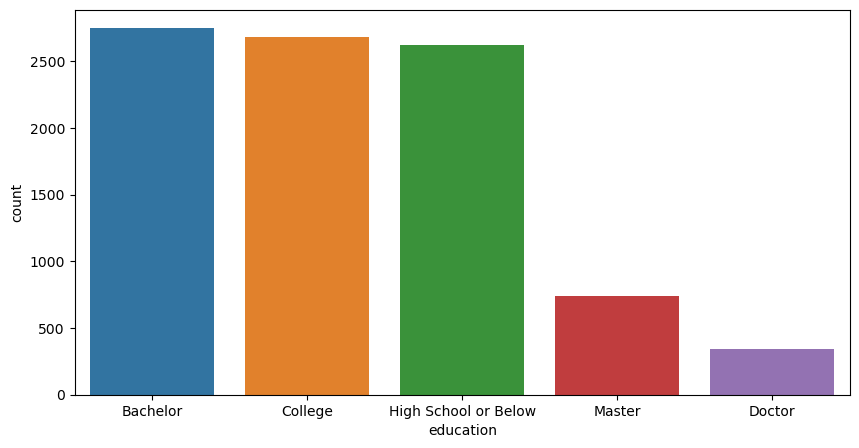

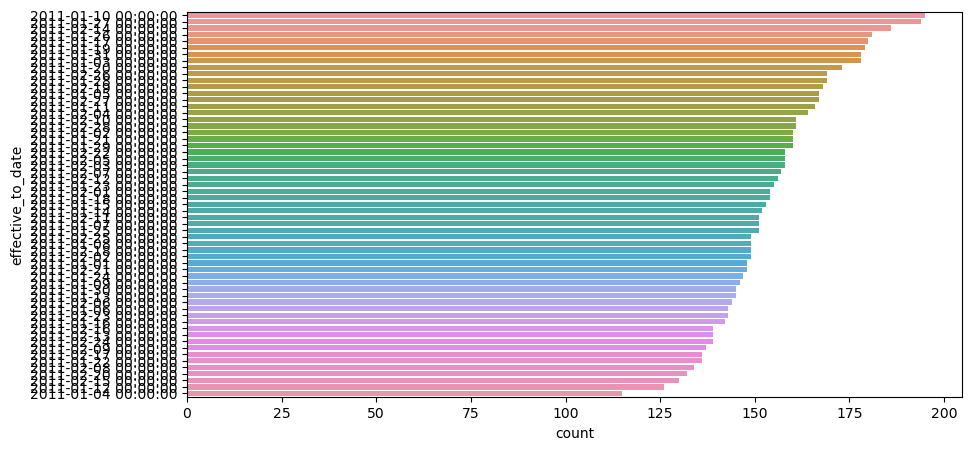

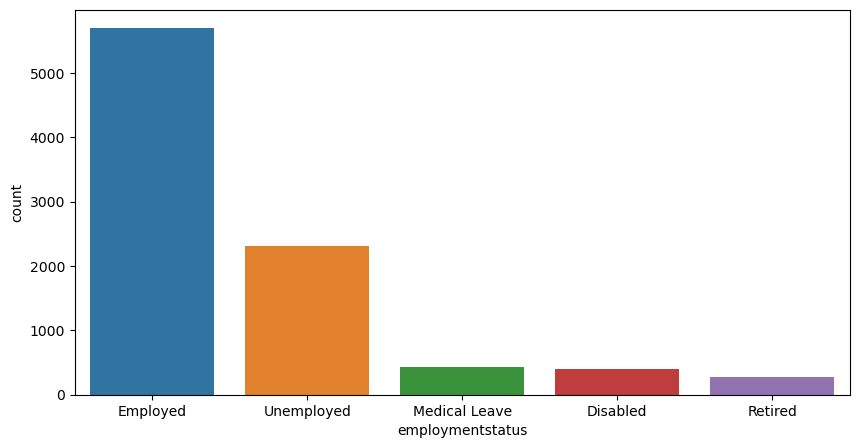

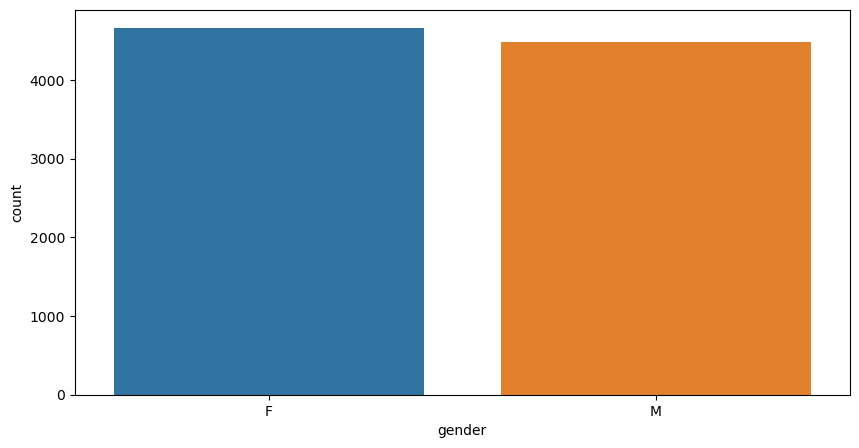

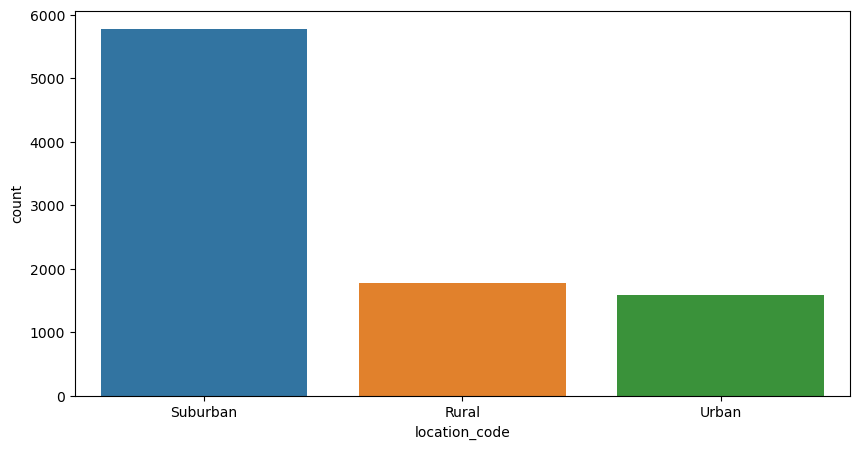

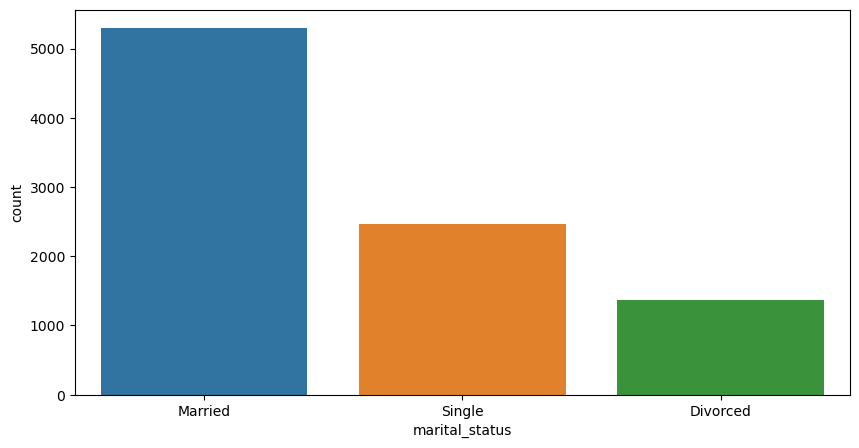

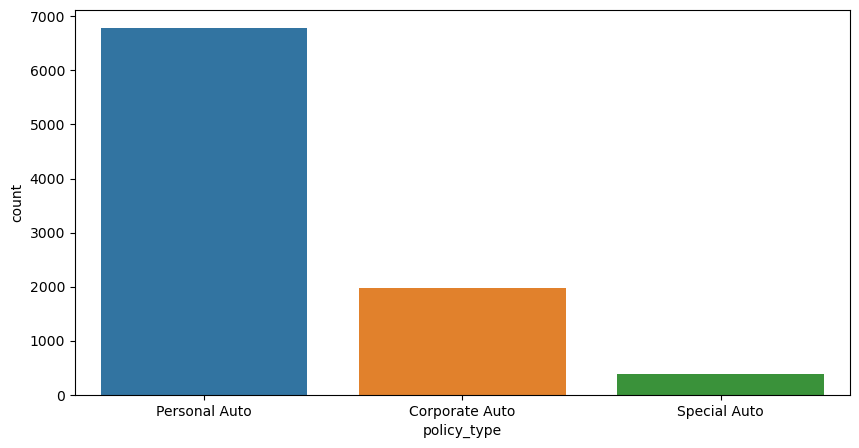

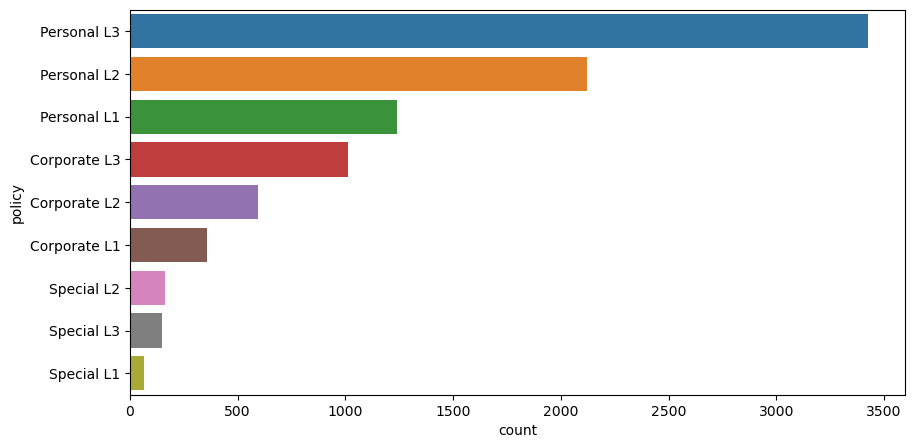

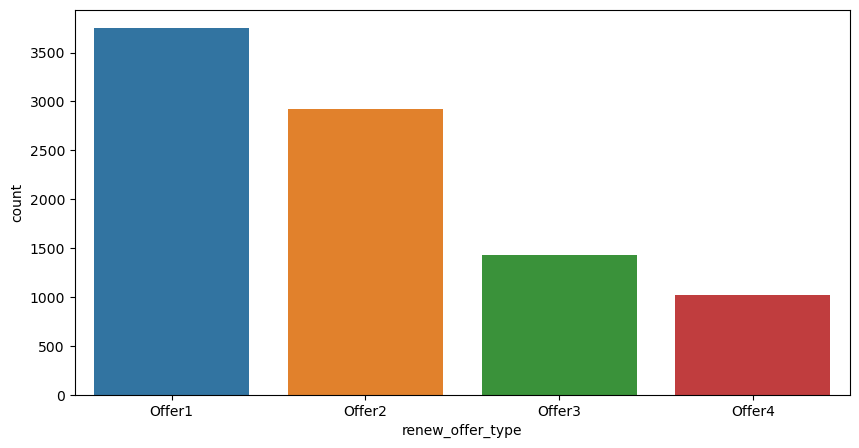

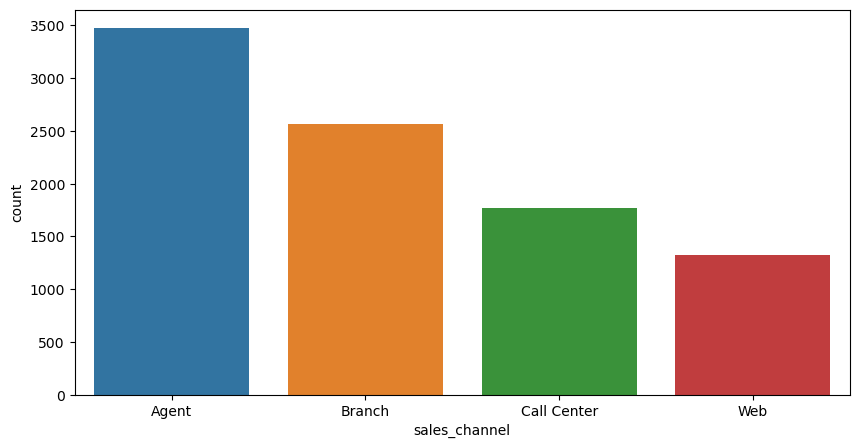

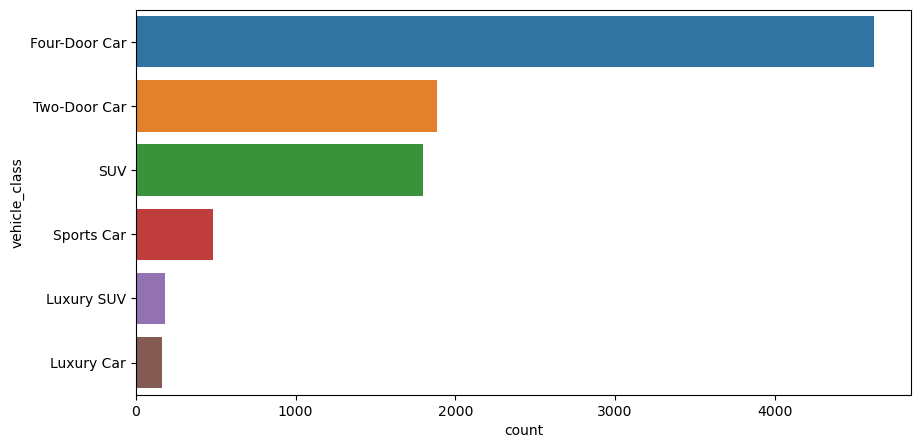

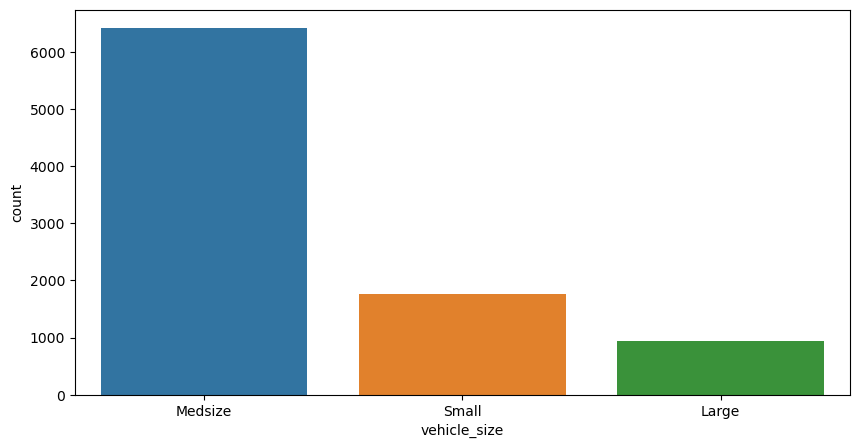

In [41]:
create_countplot(df_cat)

2. `policy_type` and `policy` columns are redundant, and what's worse `policy` column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column `policy_type` and transform the column `policy` to three possible values: L1, L2, and L3 using a function.

In [42]:
# drop column 'policy type'
df_cat.drop(columns='policy_type', inplace=True)

In [43]:
# transform column 'policy' and cluster the values to L1, L2, L3
df_cat['policy'] = df_cat['policy'].apply(lambda x: x.split()[1])

3. Time dependency analysis. Use a seaborn line plot using the column `effective_to_date` to see if `total_claim_amount` is bigger at some specific dates. Use a figsize=(10,10)

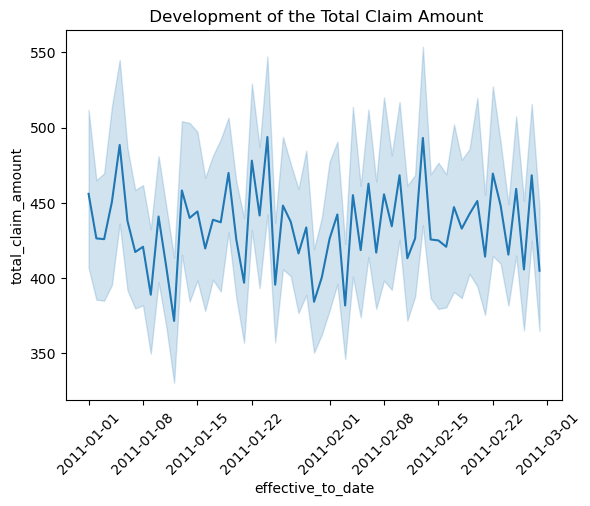

In [44]:
fig = figsize=(10,10)
sns.lineplot(data=customer_df, x=customer_df['effective_to_date'], y=customer_df['total_claim_amount']).set_title(' Development of the Total Claim Amount')
plt.xticks(rotation=45)
plt.show()

4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
* `day` with the day number of `effective_to_date`
* `day_name` with the day NAME of `effective_to_date`
* `week` with the week of `effective_to_date`
* `month` with the month NAME of `effective_to_date`
* `total_claim_amount` with `total_claim_amount`

In [45]:
time_df = pd.DataFrame()

In [46]:
time_df['day'] = customer_df['effective_to_date'].dt.day
time_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
time_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
time_df['month'] = customer_df['effective_to_date'].dt.month_name()
time_df['total_claim_amount'] = customer_df['total_claim_amount']

In [47]:
time_df

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


5. Compute the total `target` column aggregated `day_name` rounded to two decimals and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_days)`

In [48]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
target_column = time_df.groupby('day_name')['total_claim_amount'].sum().round(2).reindex(index=list_of_correct_days)
target_column

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

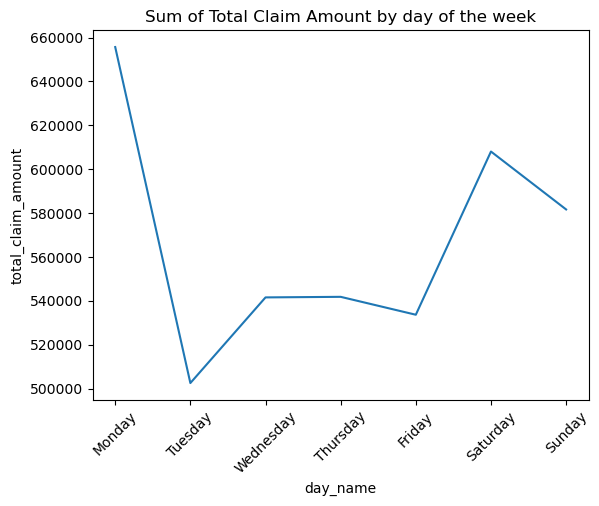

In [49]:
# Sum of total claim amount peaks on Mondays:
fig = figsize=(10,10)
sns.lineplot(data=target_column).set_title('Sum of Total Claim Amount by day of the week')
plt.xticks(rotation=45)
plt.show()

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_values)`

In [50]:
list_of_correct_values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
target_column2 = time_df.groupby(['day_name']).agg({'total_claim_amount':'count'}).reindex(index=list_of_correct_values)
target_column2

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [51]:
list_of_correct_values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
target3 = time_df.groupby(['day_name']).agg({'total_claim_amount':'median'}).round(2).reindex(index=list_of_correct_values).sort_values(by='total_claim_amount' ,ascending=False)
target3

,total_claim_amount
day_name,
Thursday,395.33
Wednesday,392.24
Monday,385.74
Sunday,383.72
Saturday,379.20
Tuesday,378.49
Friday,371.80


9. Plot the median "target" by day of the week name using a seaborn barplot
10. What can you conclude from this analysis?

In [52]:
target3.index

Index(['Thursday', 'Wednesday', 'Monday', 'Sunday', 'Saturday', 'Tuesday',
       'Friday'],
      dtype='object', name='day_name')

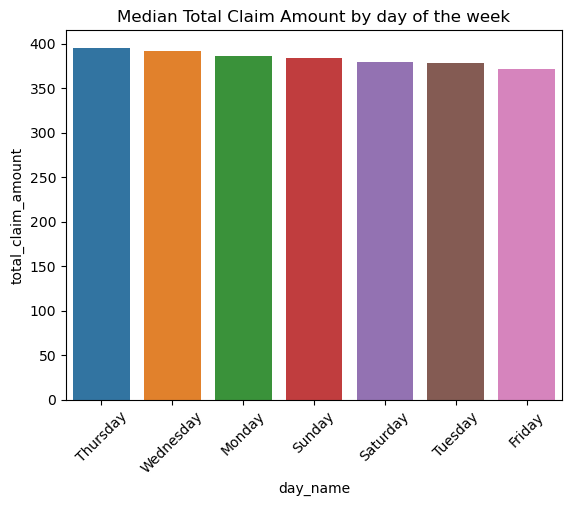

In [53]:
fig = figsize=(5,5)
sns.barplot(data=target3, x=target3.index, y='total_claim_amount').set_title('Median Total Claim Amount by day of the week')
plt.xticks(rotation=45)
plt.show()

The median amount is pretty similar on each day of the week. There might have been one or more outliers in the past that had a huge impact on the sum of claim amounts on Mondays. 

11. Compute the total `target` column aggregated `month` rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
12. Can you do a monthly analysis given the output of the previous series? Why?

In [54]:
list_of_correct_values = ['January', 'February']
target4 = time_df.groupby(['month']).agg({'total_claim_amount':'sum'}).round(2).reindex(index=list_of_correct_values).sort_values(by='total_claim_amount' ,ascending=False)
target4

,total_claim_amount
month,
January,2117142.86
February,1847824.19


A monthly analysis is yet not really possible. We only have two month in the dataset. For an analysis on a monthly basis we would need more months.

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [55]:
def define_outliers(df: pd.DataFrame, thr: 3):
    '''
    
    '''
    for col in df.columns:
        column_std_thr = (df[col].std()) * thr
        column_mean = df[col].mean()
        df['deviation_mean_from_std'] = (abs(column_mean - df[col])<=column_std_thr)
        df = df[(df['deviation_mean_from_std']==True)]
        df.drop(columns='deviation_mean_from_std',inplace=True)
    return df

In [56]:
df_num_contin.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

In [57]:
df_num_contin = define_outliers(df_num_contin, 3)

/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_3515/3539862792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deviation_mean_from_std'] = (abs(column_mean - df[col])<=column_std_thr)
/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_3515/3539862792.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='deviation_mean_from_std',inplace=True)
/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_3515/3539862792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [58]:
df_num_contin

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


16. Concatenate the `continuous_cleaned_df`, `discrete_df`, `categorical_df`, and the relevant column of `time_df`. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using `pd.concat()`) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use `pd.dropna()` and `.reset_index()` to fix the final dataframe.

In [59]:
customer_df = pd.concat([df_num_contin, df_num_discr, df_cat, time_df['day'], time_df['week']], axis=1).dropna().reset_index()

In [60]:
customer_df.columns

Index(['index', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'day', 'week'],
      dtype='object')

In [61]:
customer_df.drop(columns=['index','effective_to_date'],inplace=True)

17. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [62]:
customer_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'day', 'week'],
      dtype='object')

In [63]:
customer_df = customer_df[['customer_lifetime_value', 'income', 'monthly_premium_auto','months_since_policy_inception'
                           , 'months_since_last_claim','number_of_open_complaints', 'number_of_policies', 'state', 'response',
             'coverage', 'education', 'employmentstatus','gender', 'location_code', 'marital_status', 'policy',
             'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'day', 'week', 'total_claim_amount' ]]

18. Turn the `response` column values into (Yes=1/No=0).

In [64]:
customer_df['response'] = customer_df['response'].replace({'Yes':1, 'No':0})

19. Reduce the class imbalance in `education` by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [65]:
customer_df['education'] = customer_df['education'].apply(lambda x: x.replace(x,'Graduate') if x in ['Master', 'Doctor'] else x)

In [66]:
customer_df['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

20. Reduce the class imbalance of the `employmentstatus` column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [67]:
customer_df['employmentstatus'] = customer_df['employmentstatus'].apply(lambda x: x.replace(x,'Inactive') if x in ["Medical Leave", "Disabled", "Retired"] else x)

In [68]:
customer_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

21. Deal with column `gender` turning the values into (1/0).

In [69]:
customer_df['gender'] = customer_df['gender'].replace({'F':1, 'M':0})

22. Now, deal with `vehicle_class` grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called `Luxury` leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [70]:
customer_df['vehicle_class'] = customer_df['vehicle_class'].apply(lambda x: x.replace(x,'Luxury') if x in ["Sports Car", "Luxury SUV", "Luxury Car"] else x)

In [71]:
customer_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

23. Now it's time to deal with the **categorical ordinal columns**, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".
24. Encode the column `employmentstatus` as: "Employed" > "Inactive" > "Unemployed".
25. Encode the column `location_code` as: "Urban" > "Suburban" > "Rural".
26. Encode the column `vehicle_size` as: "Large" > "Medsize" > "Small".

I also ordered `education`

27. Get a dataframe with the **categorical nominal columns**

In [72]:
coverage_dict = {'Premium':2, 'Extended':1, 'Basic':0}
employment_dict = {'Employed':2, 'Inactive':1, 'Unemployed':0}
location_dict = {'Urban':2, 'Suburban':1, 'Rural':0}
vehicle_dict = {'Large':2, 'Medsize':1, 'Small':0}
education_dict = {'Graduate':3, 'Bachelor':2, 'College':1, 'High School or Below':0}

In [73]:
customer_df['coverage'] = customer_df['coverage'].replace(coverage_dict)
customer_df['employmentstatus'] = customer_df['employmentstatus'].replace(employment_dict)
customer_df['location_code'] = customer_df['location_code'].replace(location_dict)
customer_df['vehicle_size'] = customer_df['vehicle_size'].replace(vehicle_dict)
customer_df['education'] = customer_df['education'].replace(education_dict)

27. Get a dataframe with the **categorical nominal columns**

In [74]:
df_cat_nom = customer_df[['state', 'marital_status','policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']]

In [75]:
df_cat_nom

,state,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Married,L3,Offer1,Agent,Two-Door Car
1,Arizona,Single,L3,Offer3,Agent,Four-Door Car
2,Nevada,Married,L3,Offer1,Agent,Two-Door Car
3,California,Married,L2,Offer1,Call Center,SUV
4,Washington,Single,L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...
8570,California,Married,L1,Offer2,Web,Four-Door Car
8571,California,Divorced,L3,Offer1,Branch,Four-Door Car
8572,California,Single,L2,Offer1,Branch,Four-Door Car
8573,California,Married,L2,Offer3,Branch,Four-Door Car


8. Create a list of named `levels` which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

```python
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
```
28. Instantiate an [sklearn OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) with drop set to `first` and categories to `levels`


In [76]:
for i in df_cat_nom:
    print(df_cat_nom[i].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['Married' 'Single' 'Divorced']
['L3' 'L2' 'L1']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury']


In [77]:
df_cat_nom

,state,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Married,L3,Offer1,Agent,Two-Door Car
1,Arizona,Single,L3,Offer3,Agent,Four-Door Car
2,Nevada,Married,L3,Offer1,Agent,Two-Door Car
3,California,Married,L2,Offer1,Call Center,SUV
4,Washington,Single,L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...
8570,California,Married,L1,Offer2,Web,Four-Door Car
8571,California,Divorced,L3,Offer1,Branch,Four-Door Car
8572,California,Single,L2,Offer1,Branch,Four-Door Car
8573,California,Married,L2,Offer3,Branch,Four-Door Car


In [78]:
levels = [ ['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], 
          ['Married', 'Single', 'Divorced'], 
          ['L3', 'L2', 'L1'],
          ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
          ['Agent', 'Call Center', 'Web', 'Branch'],
          ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]

In [79]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(drop='first', sparse_output=False, categories=levels)
df_cat_nom_encoded = oh_encoder.fit_transform(df_cat_nom)

In [80]:
df_cat_nom_encoded_df = pd.DataFrame(df_cat_nom_encoded, columns=oh_encoder.get_feature_names_out(df_cat_nom.columns))

In [81]:
df_cat_nom_encoded_df

,state_Arizona,state_Nevada,state_California,state_Oregon,marital_status_Single,marital_status_Divorced,policy_L2,policy_L1,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8571,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8572,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8573,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Lab | Comparing regression models


For this lab, we will be using the dataset in the Customer Analysis Business Case of the previous lab. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

# Special instructions
As in this lab we will keep working of the same dataset of the previous lab, please make a copy of the final Jupyter notebook of the previous lab in the current lab folder. Next, use Markdown to add a new section in the Jupyter notebook named Lab Comparing Regression Models. Then restart the Kernel and run all the previous cells. Finally, keep working of the same notebook according to the next instructions.

# Instructions

1. Define X and y
2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31
3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [82]:
customer_df.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,week,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,0,...,1,Married,L3,Offer1,Agent,Two-Door Car,1,24,8,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,1,...,1,Single,L3,Offer3,Agent,Four-Door Car,1,31,5,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,2,...,1,Married,L3,Offer1,Agent,Two-Door Car,1,19,7,566.472247


In [83]:
X = customer_df.drop(columns='total_claim_amount')
y = customer_df['total_claim_amount']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [85]:
# use function that I created earlier:
X_train_num, X_train_cat = split_df(X_train)
X_test_num, X_test_cat = split_df(X_test)

In [86]:
display(X_train_num.head(3))
display(X_train_cat.head(3))

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,education,employmentstatus,gender,location_code,vehicle_size,day,week
7257,12476.647590,0.0,121.0,34.0,7,0,2,0,1,0,0,0,1,1,1,52
5720,2595.558788,27734.0,65.0,86.0,12,0,1,0,0,3,2,1,2,1,27,4
8210,2309.876793,0.0,61.0,57.0,16,0,1,0,0,2,0,1,0,1,25,8


,state,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
7257,Oregon,Single,L3,Offer1,Call Center,SUV
5720,California,Married,L3,Offer2,Call Center,Four-Door Car
8210,California,Divorced,L3,Offer1,Agent,Four-Door Car


4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use `.toarray()` after `.transform()` to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using `encoder.get_feature_names_out()` and the same indexes of X_train_cat and X_test_cat

In [87]:
levels = [ ['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], 
          ['Married', 'Single', 'Divorced'], 
          ['L3', 'L2', 'L1'],
          ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
          ['Agent', 'Call Center', 'Web', 'Branch'],
          ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]

from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(drop='first', sparse_output=False, categories=levels)
#fit-transform train
X_train_cat_encoded = oh_encoder.fit_transform(X_train_cat)

#transform test
X_test_cat_encoded = oh_encoder.transform(X_test_cat)

#cast to pd DataFrame
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=oh_encoder.get_feature_names_out(X_train_cat.columns), index=X_train_cat.index)
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=oh_encoder.get_feature_names_out(X_test_cat.columns), index=X_test_cat.index)

In [88]:
X_test_cat_encoded

,state_Arizona,state_Nevada,state_California,state_Oregon,marital_status_Single,marital_status_Divorced,policy_L2,policy_L1,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury
2296,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4306,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5074,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
6296,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7608,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2405,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2043,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as:
X_train_num_transformed_df and X_test_num_transformed_df

In [89]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()

#fit-transform train
X_train_num_transformed = transformer.fit_transform(X_train_num)

#transform test
X_test_num_transformed = transformer.transform(X_test_num)

#cast to pd DataFrame
X_train_num_transformed = pd.DataFrame(X_train_num_transformed, columns=(X_train_num.columns), index=X_train_num.index)
X_test_num_transformed = pd.DataFrame(X_test_num_transformed, columns=(X_test_num.columns), index=X_test_num.index)

In [90]:
X_train_num_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,6002.0,8.405879e-15,1.000083,-2.208121,-0.698760,-0.018569,0.693611,2.295066
income,6002.0,-2.053968e-16,1.000083,-1.662875,-0.248649,0.363613,0.758137,1.115884
monthly_premium_auto,6002.0,8.796252e-14,1.000083,-1.541686,-0.883225,-0.127329,0.955738,2.134258
months_since_policy_inception,6002.0,2.036210e-16,1.000083,-2.098784,-0.784997,0.094937,0.831719,1.641510
months_since_last_claim,6002.0,-2.568940e-16,1.000083,-1.953613,-0.828374,0.060520,0.825105,1.662698
number_of_open_complaints,6002.0,4.084259e-17,1.000083,-0.508609,-0.508609,-0.508609,-0.508609,2.027151
number_of_policies,6002.0,9.020886e-16,1.000083,-1.134627,-1.134627,-0.066679,0.868793,1.658115
response,6002.0,4.498604e-17,1.000083,-0.403674,-0.403674,-0.403674,-0.403674,2.477245
coverage,6002.0,-1.337743e-16,1.000083,-0.774612,-0.774612,-0.774612,1.205715,1.560779
education,6002.0,-2.265580e-16,1.000083,-1.357806,-1.357806,-0.149401,0.774619,1.551872


6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [91]:
X_train_new = pd.concat([X_train_num_transformed, X_train_cat_encoded],axis=1)
X_test_new = pd.concat([X_test_num_transformed, X_test_cat_encoded],axis=1)

7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as:
X_train_new_scaled_df and X_test_new_scaled_df

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit-transform train
X_train_new_scaled = scaler.fit_transform(X_train_new)

#transform test
X_test_new_scaled = scaler.transform(X_test_new)

#cast to pd DataFrame
X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled, columns=(X_train_new.columns), index=X_train_new.index)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled, columns=(X_test_new.columns), index=X_test_new.index)

8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [93]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train_new_scaled_df, y_train)

In [94]:
y_train_pred = lr.predict(X_train_new_scaled_df)
y_test_pred = lr.predict(X_test_new_scaled_df)

9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

|Error_metric| Value |
|------------|-------|
| MAE        | value |
| MSE        | value |
| RMSE       | value |
| MAPE       | value |
| R2         | value |

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def error_metrics (y_true: str, y_pred: str):
    error_metrics = []
    error_metrics.append(mean_absolute_error(y_true, y_pred))
    error_metrics.append(mean_squared_error(y_true, y_pred))
    error_metrics.append(mean_squared_error(y_true, y_pred, squared=False))
    error_metrics.append(mean_absolute_percentage_error(y_true, y_pred))
    error_metrics.append(r2_score(y_true, y_pred))
    error_df = pd.DataFrame(['MAE','MSE', 'RMSE', 'MAPE','R2'],columns=['Error_metrics'])
    error_df['Value']= pd.DataFrame(error_metrics).round(2)
    return error_df

10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets

In [96]:
error_metrics_train = error_metrics(y_train, y_train_pred)
error_metrics_test = error_metrics(y_test, y_test_pred)

In [97]:
display(error_metrics_train)
display(error_metrics_test)

,Error_metrics,Value
0,MAE,118.54
1,MSE,23074.14
2,RMSE,151.90
3,MAPE,1.56
4,R2,0.53


,Error_metrics,Value
0,MAE,119.24
1,MSE,23623.64
2,RMSE,153.70
3,MAPE,1.65
4,R2,0.52


Both sets of metrics are quite similar, suggesting that the model performs consistently on both the training and test data. However, the model might not be capturing some aspects of the data, given the moderate R2 values.
The models predictions are off by approx 118.54|119.24 from the actual values.

11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.

In [98]:
def train_models (list_of_models, X_train, y_train):
    list_trained_models = []
    for m in list_of_models:
        model = m().fit(X_train, y_train)
        list_trained_models.append(model)
    return list_trained_models

12. Use the function to train the following models (with default settings):

In [99]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

list_of_models =  [LinearRegression, KNeighborsRegressor, MLPRegressor]
trained_models = train_models(list_of_models, X_train_new_scaled_df, y_train)

/Users/alinaaufenanger/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
trained_models

[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

15. Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options? 

In [101]:
for model in trained_models:
    y_train_pred = model.predict(X_train_new_scaled_df)
    y_test_pred = model.predict(X_test_new_scaled_df)
    print(f"Metrics report for {model} on train set:")
    display(error_metrics(y_train, y_train_pred))
    print(f"Metrics report for {model} on test set:")
    display(error_metrics(y_test, y_test_pred))

Metrics report for LinearRegression() on train set:


,Error_metrics,Value
0,MAE,118.54
1,MSE,23074.14
2,RMSE,151.90
3,MAPE,1.56
4,R2,0.53


Metrics report for LinearRegression() on test set:


,Error_metrics,Value
0,MAE,119.24
1,MSE,23623.64
2,RMSE,153.70
3,MAPE,1.65
4,R2,0.52


Metrics report for KNeighborsRegressor() on train set:


,Error_metrics,Value
0,MAE,100.11
1,MSE,18044.37
2,RMSE,134.33
3,MAPE,1.54
4,R2,0.63


Metrics report for KNeighborsRegressor() on test set:


,Error_metrics,Value
0,MAE,124.56
1,MSE,28207.61
2,RMSE,167.95
3,MAPE,2.08
4,R2,0.43


Metrics report for MLPRegressor() on train set:


,Error_metrics,Value
0,MAE,116.69
1,MSE,22499.42
2,RMSE,150.00
3,MAPE,1.46
4,R2,0.54


Metrics report for MLPRegressor() on test set:


,Error_metrics,Value
0,MAE,116.39
1,MSE,22811.13
2,RMSE,151.03
3,MAPE,1.48
4,R2,0.54


Linear Regression has lower R2 values compared to both KNeighborsRegressor and MLPRegressor, indicating less explained variance.
KNeighborsRegressor shows higher R2 on the training set but performs worse on the test set compared to MLPRegressor. It might be overfitting.
MLPRegressor shows consistency between training and test performance and a better R2 score than linear regression.